**PART 1: Data Cleaning** 

In [ ]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import mannwhitneyu 
import warnings
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 45.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Reading the csv files
df = pd.read_csv('/content/Covid19-vaccination.csv')
df2 = pd.read_csv('/content/Complete_covid19_dataset.csv')

In [ ]:
df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63001,Zimbabwe,ZWE,2021-11-17,NaN,NaN,NaN,NaN,NaN,27152.0,NaN,NaN,NaN,NaN,1799.0,19962.0,0.132
63002,Zimbabwe,ZWE,2021-11-18,6310431.0,3583256.0,2727175.0,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0,0.151
63003,Zimbabwe,ZWE,2021-11-19,6362499.0,3625221.0,2737278.0,NaN,52068.0,33163.0,42.16,24.02,18.14,NaN,2197.0,25915.0,0.172
63004,Zimbabwe,ZWE,2021-11-20,6396012.0,3651820.0,2744192.0,NaN,33513.0,34377.0,42.38,24.20,18.18,NaN,2278.0,26983.0,0.179


In [ ]:
# Displayng the number of NAN values in each feature
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

In [ ]:
# Droping the NAN values in total vaccination feature as we won't be able to do anything without knowing what the total vaccination was in a country
df = df.drop(df[df.total_vaccinations.isna()].index)
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

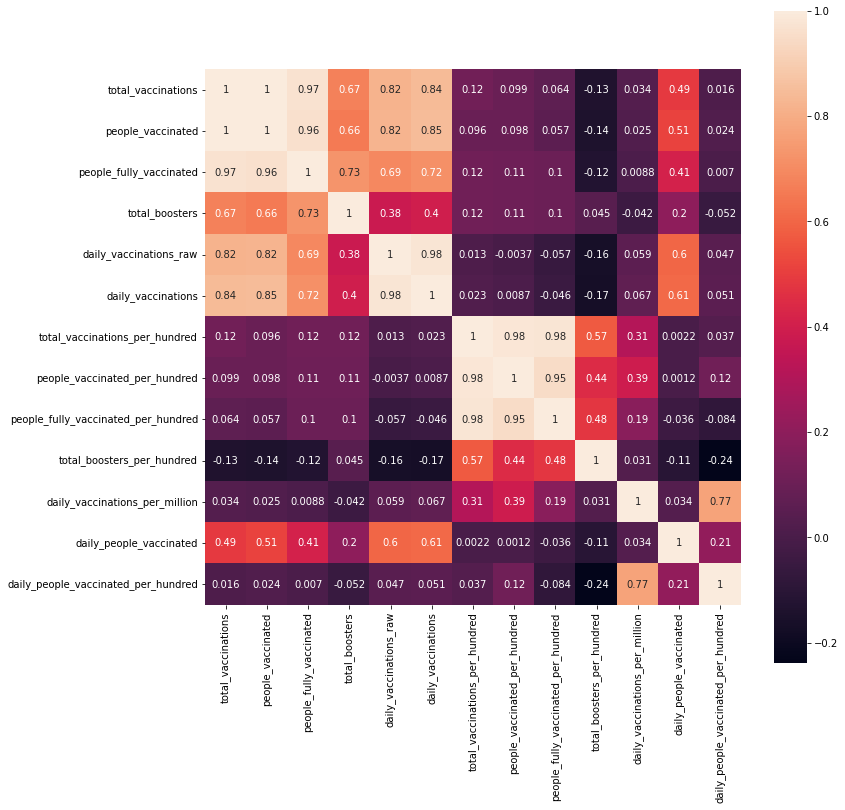

In [ ]:
#plotting the correlation matrix using the pearson method to see any relation between total vaccination and any other features
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

In [ ]:
# Creating a dataframe called check_df to statistically check for any correlation between features to fill in the NAN values
check_df = df
check_df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

In [ ]:
# Setting the max rows display to 300 to see all the countries in the dataframe
pd.set_option('display.max_rows',300)
set(check_df['location'])

{'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [ ]:
# Selecting all the countries from Canada onwards to Zimbabwe as using all the countries does affect the test
sel_countries = check_df[5097:] 

The Mann-Whitney U test is used as it helps to compare whether there is a difference in the dependent variable for two independent groups. It compares whether the distribution of the dependent variable is the same for the two groups and therefore from the same population.

In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations and people vaccinated
mannwhitneyu(sel_countries['total_vaccinations'],sel_countries['people_vaccinated'],alternative='two-sided')

MannwhitneyuResult(statistic=482039876.5, pvalue=3.985765499739441e-09)

As the p-value is less than 0.05 we reject the null hypothesis. So there is no correlation b/w the features.

In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations and people fully vaccinated
mannwhitneyu(sel_countries['total_vaccinations'],sel_countries['people_fully_vaccinated'],alternative='two-sided')

MannwhitneyuResult(statistic=472498471.0, pvalue=0.1271503251589692)

As the p-value is greater than 0.05 we accept the null hypothesis that there is a correlation b/w total vaccinations and the people fully vaccinated. So we will fill it with proper values.

In [ ]:
# Performing the MannWhitneyU test b/w daily vaccinations and people vaccinated
mannwhitneyu(sel_countries['daily_vaccinations'],sel_countries['people_vaccinated'],alternative='two-sided')

MannwhitneyuResult(statistic=139602776.5, pvalue=0.0)

As the p-value is less than 0.05 we reject the null hypothesis. So there is no correlation b/w the features.

In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations and daily vaccinations
mannwhitneyu(sel_countries['total_vaccinations'],sel_countries['daily_vaccinations'],alternative='two-sided')

MannwhitneyuResult(statistic=808170926.0, pvalue=0.0)

As the p-value is less than 0.05 we reject the null hypothesis. So there is no correlation b/w the features.




In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations and daily vaccinations raw
mannwhitneyu(sel_countries['total_vaccinations'],sel_countries['daily_vaccinations_raw'],alternative='two-sided')

MannwhitneyuResult(statistic=674997995.5, pvalue=0.0)

As the p-value is less than 0.05 we reject the null hypothesis. So there is no correlation b/w the features.

In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations per hundred and people vaccinated per hundred
mannwhitneyu(sel_countries['total_vaccinations_per_hundred'],sel_countries['people_vaccinated_per_hundred'],alternative='two-sided')

MannwhitneyuResult(statistic=537079158.5, pvalue=2.024238533005421e-211)

As the p-value is less than 0.05 we reject the null hypothesis. So there is no correlation b/w the features.

In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations per hundred and people fully vaccinated per hundred
mannwhitneyu(sel_countries['total_vaccinations_per_hundred'],sel_countries['people_fully_vaccinated_per_hundred'],alternative='two-sided')

MannwhitneyuResult(statistic=533432201.0, pvalue=1.5224571136688773e-189)

As the p-value is less than 0.05 we reject the null hypothesis. So there is no correlation b/w the features.

In [ ]:
#Since all the features showed no coorrelation in the statistic test these features NAN values will be filled with 0 instead
df.people_vaccinated = df.people_vaccinated.fillna(0)  
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
df.daily_people_vaccinated_per_hundred = df.daily_people_vaccinated_per_hundred.fillna(0)
df.total_boosters_per_hundred = df.total_boosters_per_hundred.fillna(0)
df.total_boosters = df.total_boosters.fillna(0)
df.daily_people_vaccinated = df.daily_people_vaccinated.fillna(0)
df.isna().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                4751
total_boosters                            0
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred       0
total_boosters_per_hundred                0
daily_vaccinations_per_million            0
daily_people_vaccinated                   0
daily_people_vaccinated_per_hundred       0
dtype: int64

In [ ]:
# Importing the library sklearn imputer to fill in the missing values with appropriate ones
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [ ]:
# Using the linear regression model as the estimator and min value is set to 0
imputer = IterativeImputer(estimator=LinearRegression(),n_nearest_features=1,min_value=0,random_state=0)
# Creating a temporary df to apply the imputer
check_df2 = df[['total_vaccinations','people_fully_vaccinated']]
cols_list = check_df2.columns

# Fitting the imputer to the dataframe
df_people_fully_vac = imputer.fit_transform(check_df2)
# Converting it into dataframe
df_vac = pd.DataFrame(df_people_fully_vac, columns=cols_list)

#dropping the total vaccination column before concatinating 
df_vac.drop(columns=['total_vaccinations'],inplace=True)

# droping the original people fully vaccinated column to replace with the new one
df.drop(columns=['people_fully_vaccinated'],inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)

#Concatinating to get the Final Dataframe 
df = pd.concat([df,df_vac],axis='columns')
df 

,location,iso_code,date,total_vaccinations,people_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,people_fully_vaccinated
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0
1,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,0.0,34.0,1367.0,0.003,0.0
2,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,0.0,72.0,2862.0,0.007,0.0
3,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,0.0,75.0,3000.0,0.008,0.0
4,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,0.0,201.0,8000.0,0.020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35724,Zimbabwe,ZWE,2021-11-16,6228119.0,3515140.0,0.0,37816.0,24487.0,41.27,23.29,17.98,0.0,1622.0,17188.0,0.114,2712979.0
35725,Zimbabwe,ZWE,2021-11-18,6310431.0,3583256.0,0.0,0.0,29822.0,41.81,23.74,18.07,0.0,1976.0,22810.0,0.151,2727175.0
35726,Zimbabwe,ZWE,2021-11-19,6362499.0,3625221.0,0.0,52068.0,33163.0,42.16,24.02,18.14,0.0,2197.0,25915.0,0.172,2737278.0
35727,Zimbabwe,ZWE,2021-11-20,6396012.0,3651820.0,0.0,33513.0,34377.0,42.38,24.20,18.18,0.0,2278.0,26983.0,0.179,2744192.0


In [ ]:
# Checking to see that all the nan values are now filled
df.isna().sum()

location                               0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
total_boosters                         0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated                0
daily_people_vaccinated_per_hundred    0
people_fully_vaccinated                0
dtype: int64

**PART 2: Data Visualization and Exploratory Data Analysis** 

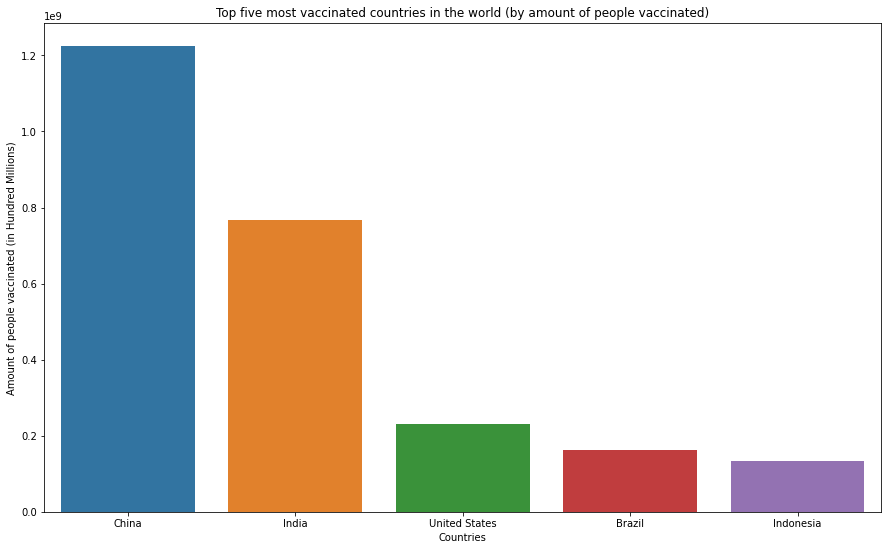

In [ ]:
# To find the most vaccinated country in the world w.r.t Total vaccinations
#Grouping the dataframe by country and sorting it based on total vaccinations 
top_total_vaccinations = df.groupby('location').people_vaccinated.max().sort_values(ascending=False)
total_vaccinations_f = top_total_vaccinations.reset_index() 
# Removing the world, high & low income rows and some continents
total_vaccinations_f.drop(index=[0,2,3,5,1,8,9,10,13,7],inplace=True)
# Plotting a barplot 
plt.figure(figsize=(15, 9))
plt.title('Top five most vaccinated countries in the world (by amount of people vaccinated)')
sns.barplot(x=total_vaccinations_f.location[0:5], y=total_vaccinations_f['people_vaccinated'])
plt.xlabel('Countries')
plt.ylabel('Amount of people vaccinated (in Hundred Millions)');

From the above chart we can see that all the top 5 countries with the most vaccinations are the ones with the highest population in the world. Also it makes sense as the top 3 countries (China,India and US) are also manufacturing their own vaccines as well and not really dependent on other countries for supply. Hence, the most vaccinated countries in the world are mostly developing countries with US being the only exception.

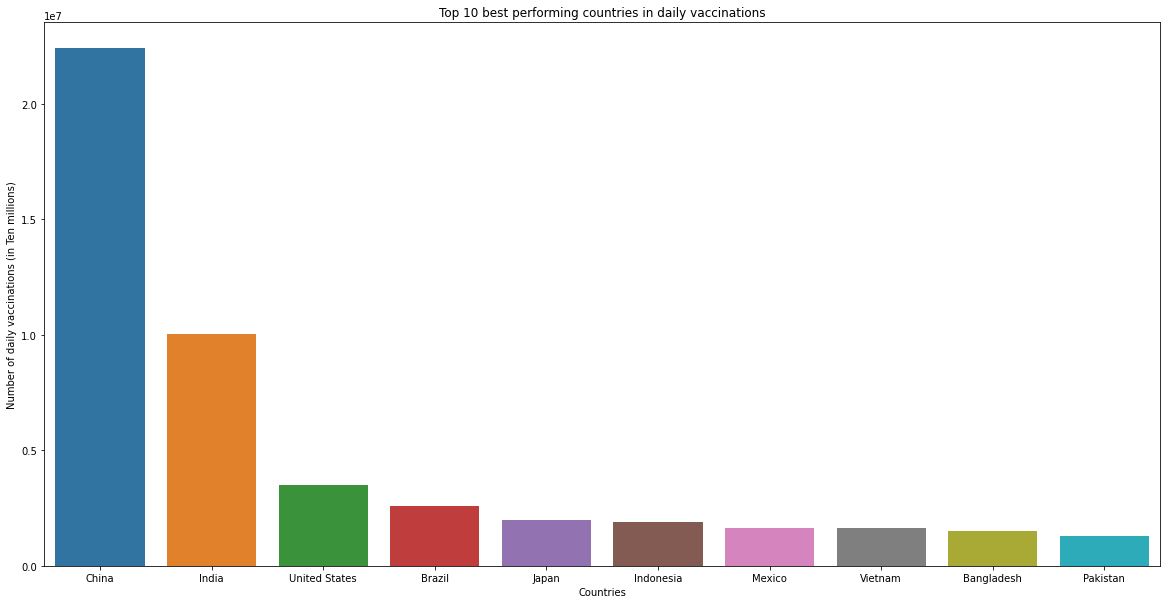

In [ ]:
# To find the best performing countries in the world w.r.t Daily vaccinations
top_daily = df.groupby('location').daily_vaccinations.max().sort_values(ascending=False)
top_daily_f = top_daily.reset_index() #reseting the index

# Removing the World, high & low income and other continents 
top_daily_f.drop(index=[0,1,2,4,6,7,8,9,10,13,23],inplace=True) 

# Plotting the data
plt.figure(figsize=(20, 10))
plt.title('Top 10 best performing countries in daily vaccinations')
sns.barplot(x=top_daily_f.location[0:10], y=top_daily_f.daily_vaccinations[0:10])
plt.xlabel('Countries')
plt.ylabel('Number of daily vaccinations (in Ten millions)')
plt.show()

From the above chart we can see the top 10 best performing countries w.r.t the daily vaccinations. The top 4 countries are the same as before only diiference being that Japan is performing better than Indonesia when it comes to the daily vaccinations. This makes sense as Japans population is vey low so it would not appear in the previous chart top 5 list w.r.t total vaccinations even though it is performing better than Indonesia. The remaining 4 countries in the list are also highly populated and hence would have the manpower and infrastructure to perform well. 

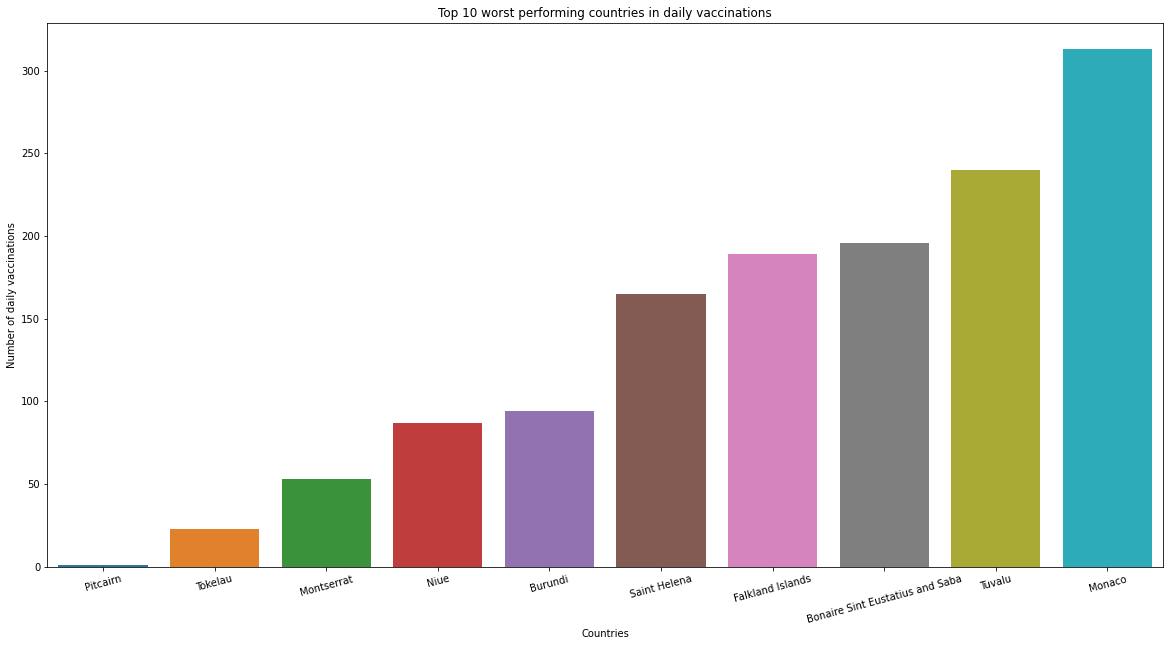

In [ ]:
# To find the worst performing countries in the world w.r.t Daily vaccinations
top_daily = df.groupby('location').daily_vaccinations.max().sort_values()
top_daily_f = top_daily.reset_index() #reseting the index

# Plotting the data
plt.figure(figsize=(20, 10))
plt.title('Top 10 worst performing countries in daily vaccinations')
sns.barplot(x=top_daily_f.location[0:10], y=top_daily_f.daily_vaccinations[0:10])
plt.xlabel('Countries')
plt.xticks(rotation = 15)
plt.ylabel('Number of daily vaccinations')
plt.show()

From the above chart we can see the top 10 worst performing countries in the world. All the countries in the list have very low population for example Pitcairn is a small island with population less than 1000 people. They also lack the infrastructure, manpower and the money to carry out vaccinations on large scale. They would also have to rely on other countries to get their vaccines, so they may not even recieve enough supply.

In [ ]:
# Taking the features needed for the time series
df_vac_time = df[['location','date','daily_vaccinations','people_fully_vaccinated']]
# Grouping by countries
vac_time = df_vac_time.groupby(['location'])
# Creating a dataframe for each of the top 10 best performing countries
china_vac = vac_time.get_group('China')
india_vac = vac_time.get_group('India')
us_vac = vac_time.get_group('United States')
brazil_vac = vac_time.get_group('Brazil')
japan_vac = vac_time.get_group('Japan')
indo_vac = vac_time.get_group('Indonesia')
mexico_vac = vac_time.get_group('Mexico')
viet_vac = vac_time.get_group('Vietnam')
ban_vac = vac_time.get_group('Bangladesh')
pak_vac = vac_time.get_group('Pakistan')


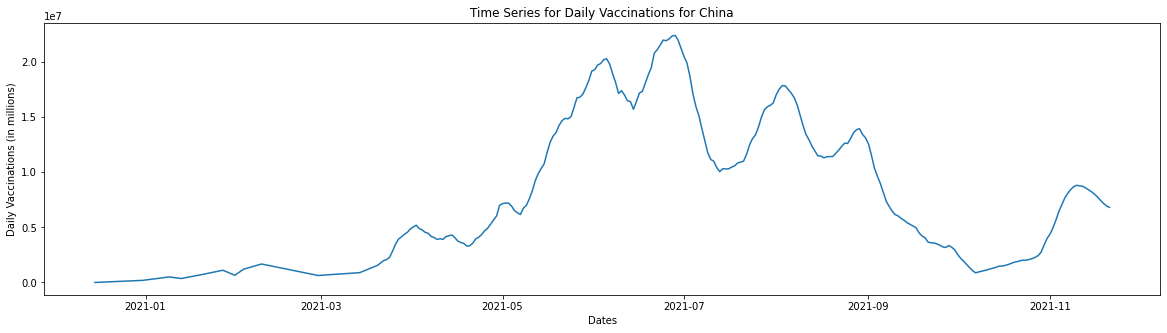

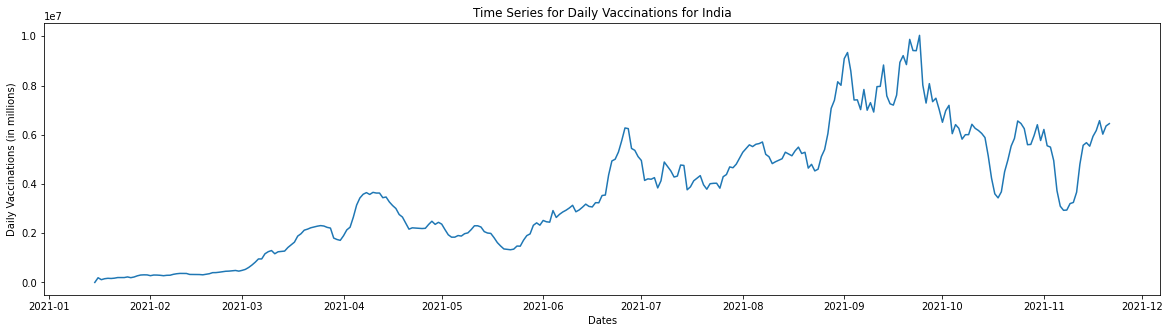

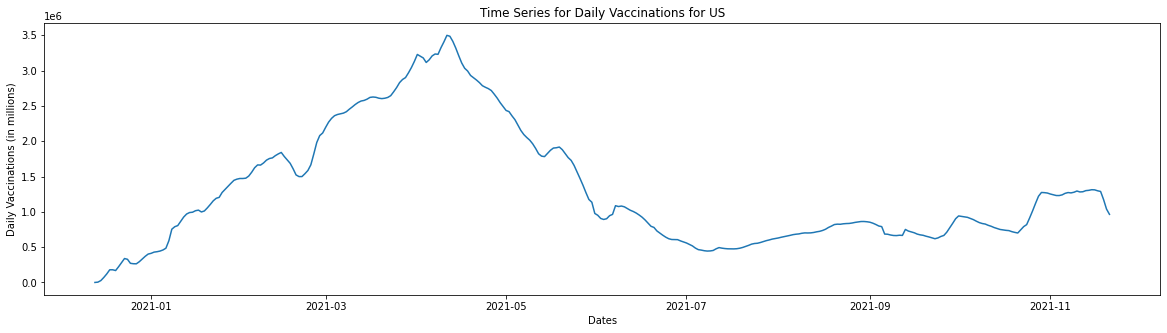

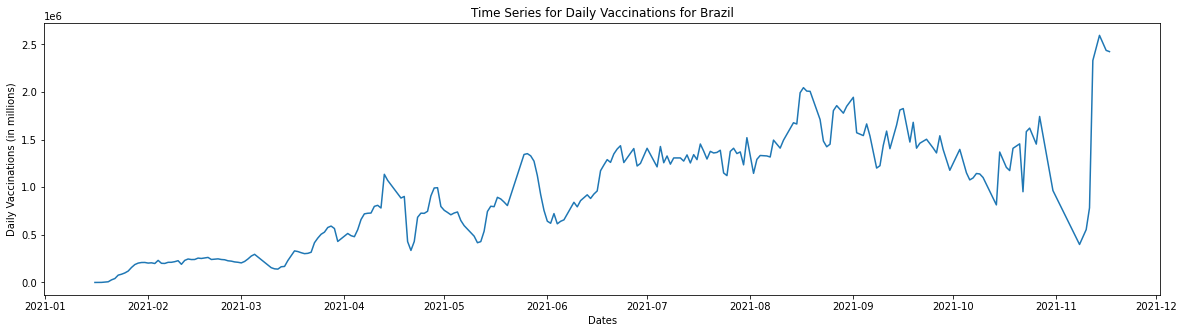

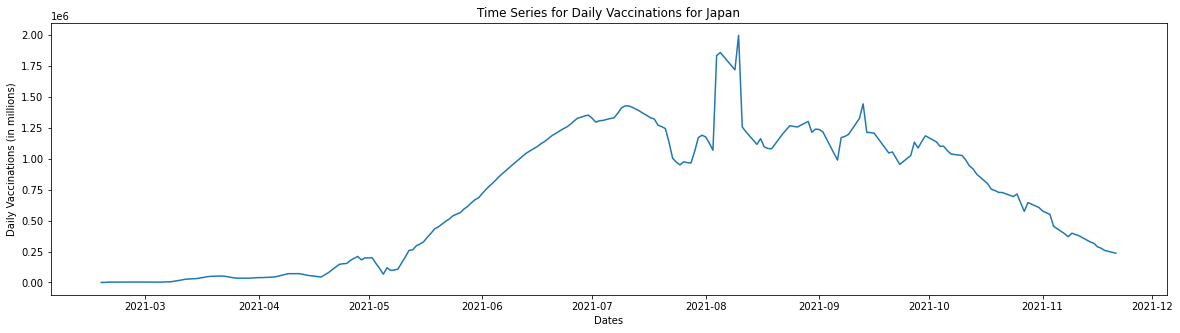

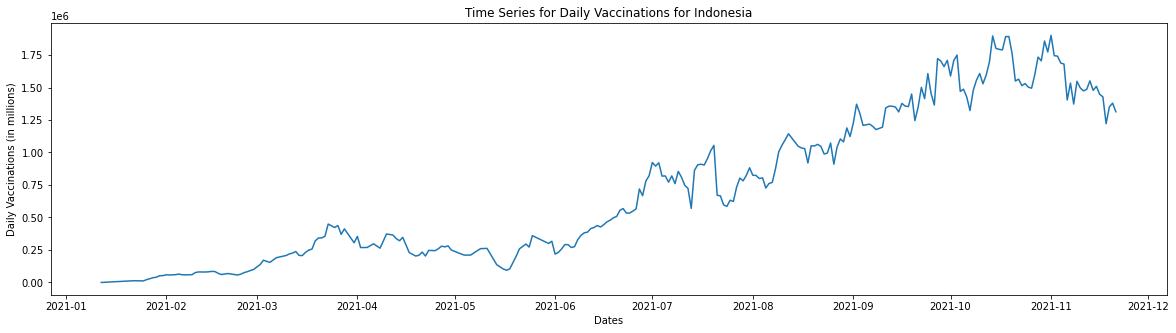

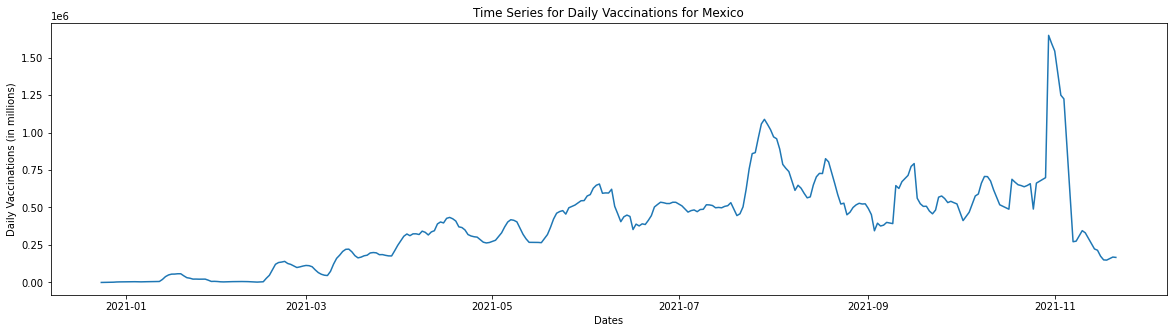

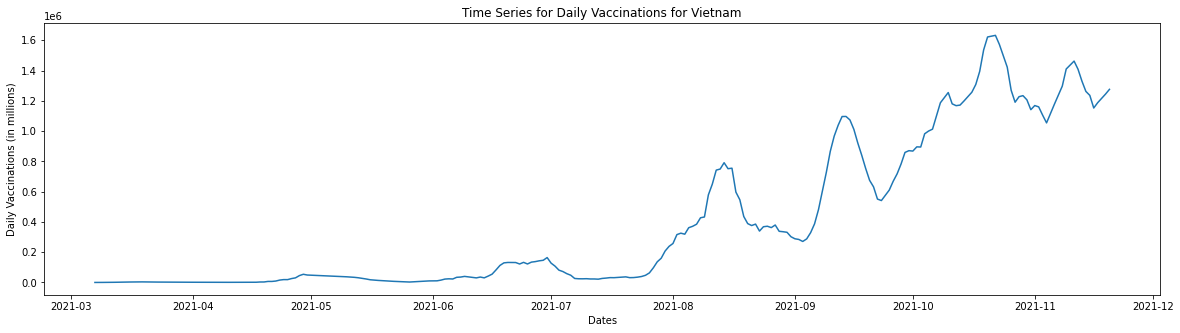

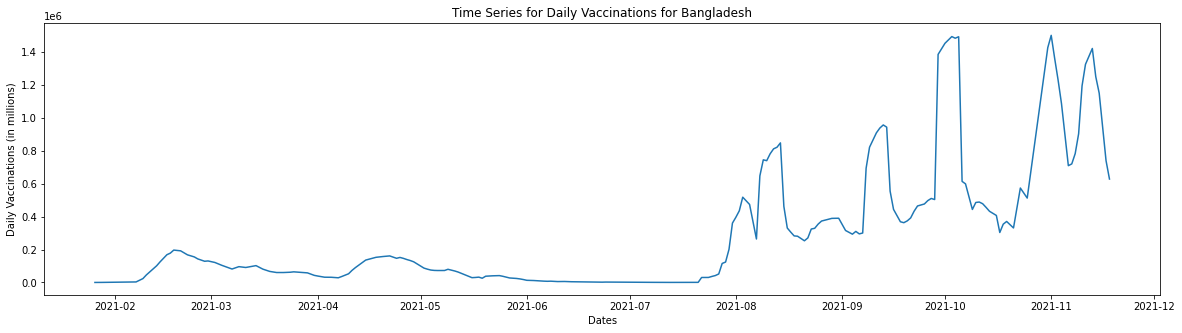

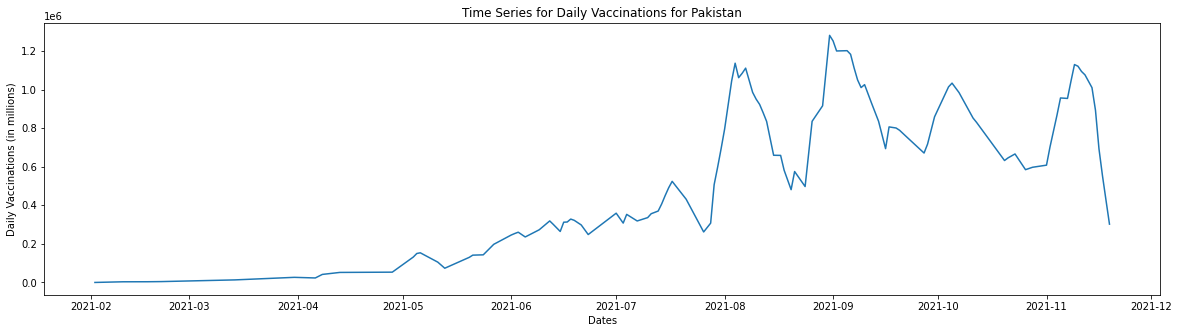

In [ ]:
# Importing datetime library and using warnings to filter out the warnings while plotting
from datetime import datetime
warnings.filterwarnings("ignore")
# List of the countries to plot the time series for the daily vaccinations
country_list = [china_vac,india_vac,us_vac,brazil_vac,japan_vac,indo_vac,mexico_vac,viet_vac,ban_vac,pak_vac]
country_list1 = ['China','India','US','Brazil','Japan','Indonesia','Mexico','Vietnam','Bangladesh','Pakistan']
i = 0
for c in country_list:
  c['date'] = pd.to_datetime(c['date'])
  plt.figure(figsize=(20,5))
  plt.plot_date(c['date'],c['daily_vaccinations'],linestyle='solid',marker='None')
  plt.title('Time Series for Daily Vaccinations for %s'%country_list1[i])
  i +=1
  plt.ylabel('Daily Vaccinations (in millions)')
  plt.xlabel('Dates')
  plt.show()

From the above time series plots we can see that China,US and Japan had huge peaks and then it drops this could be due to the fact that majority of the population were  vaccinated by this time and some of the remaining people refuse to take the vaccines could have led to the lower numbers. 
India, Brazil, Indonesia and Mexico had a steady rise in daily vaccinations rate with a little dips. Finally Pakistan, Bangladesh and Vietnam had a very slow start in the begining and had a huge increase in the vaccination rates around july 2021 probably due to lack of vaccine supply in the begining.

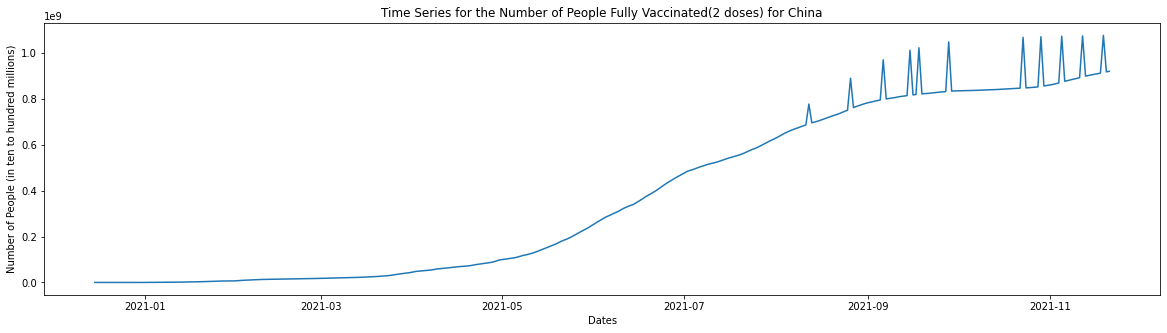

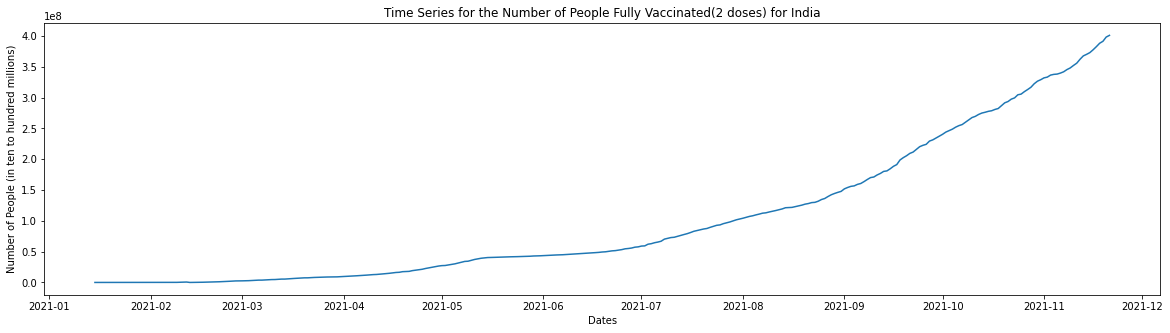

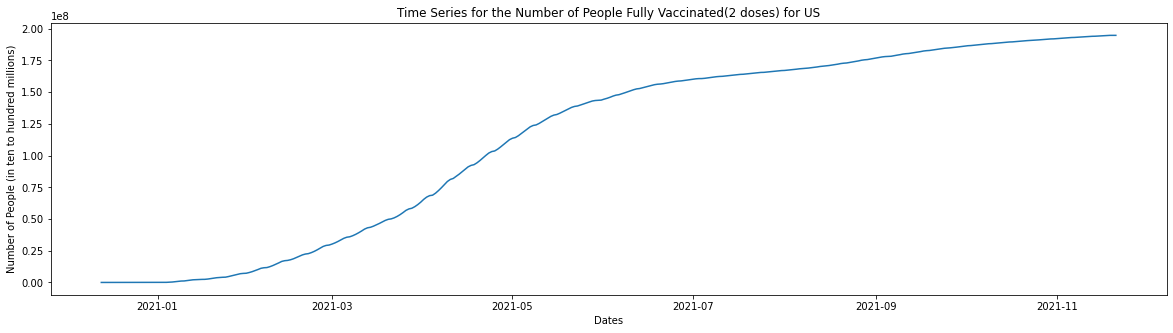

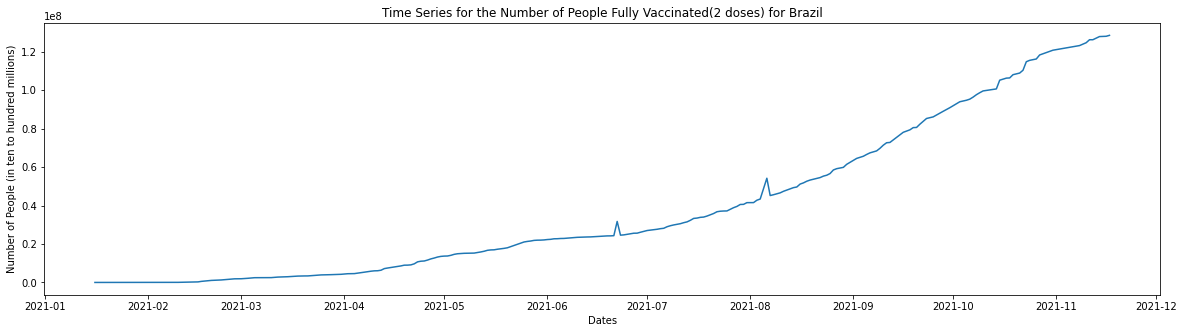

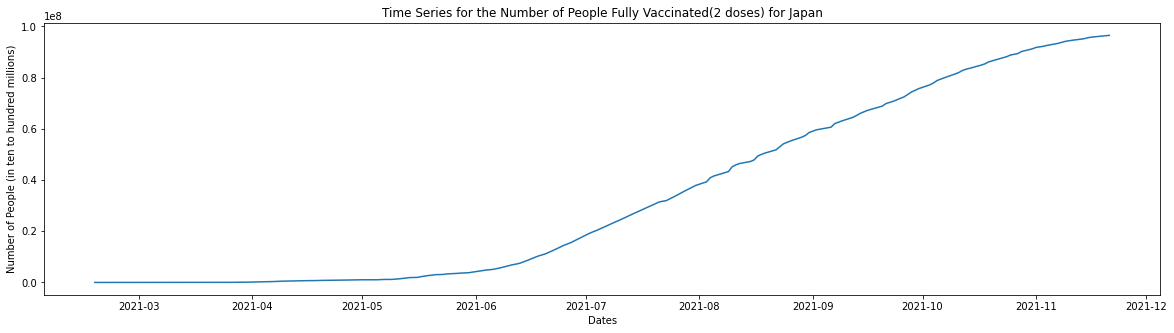

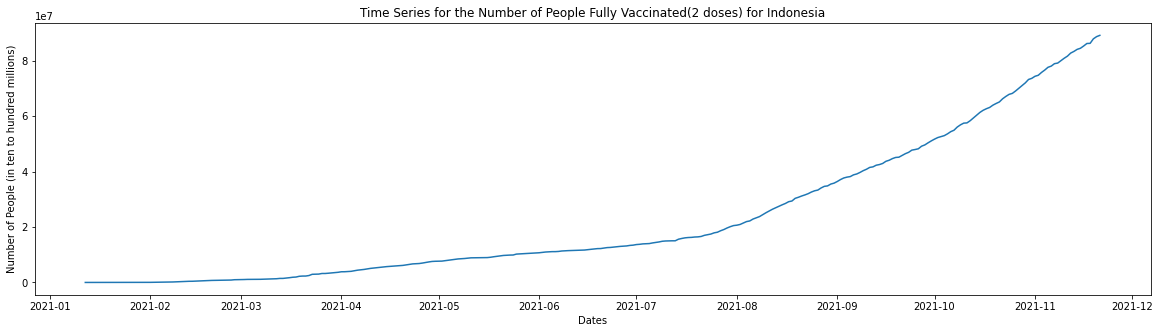

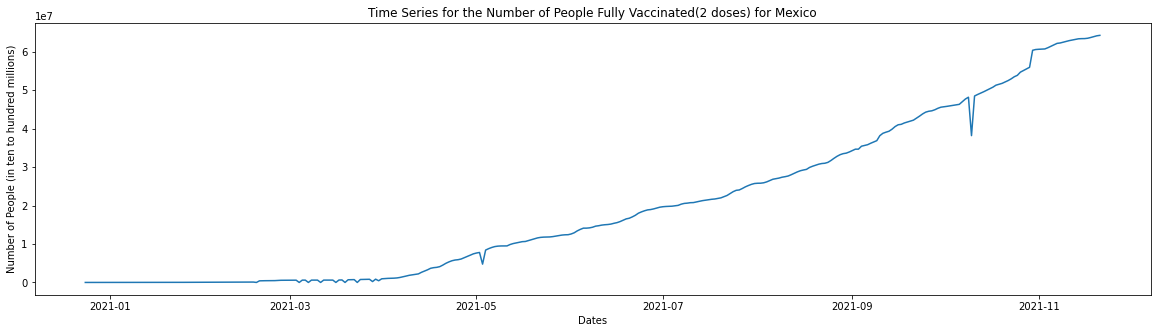

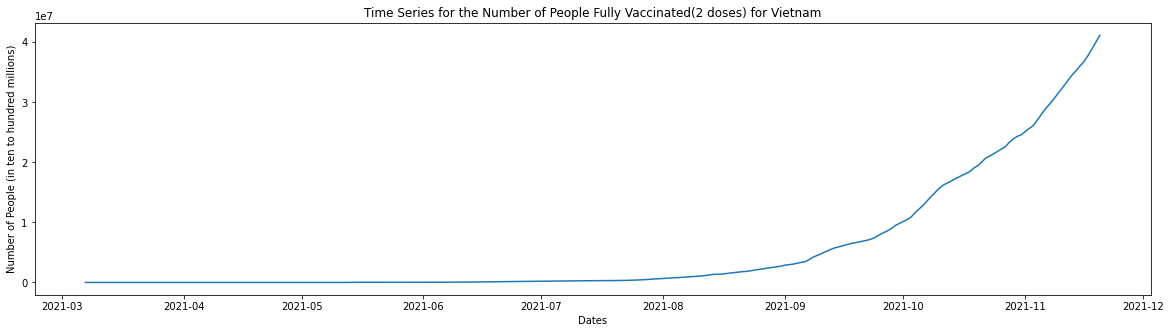

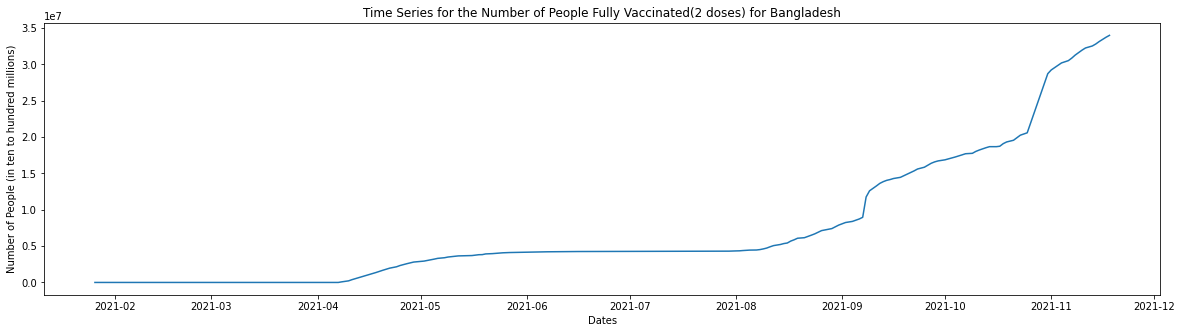

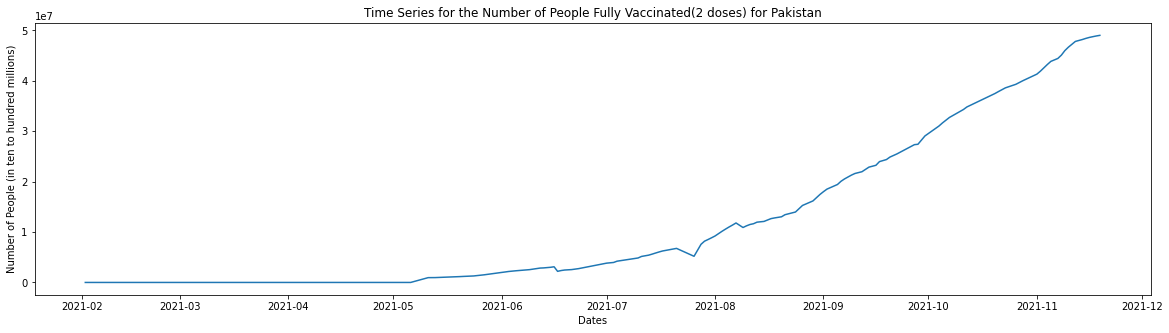

In [ ]:
# Plotting the Time-Series w.r.t People fully vaccinated for the top 10 best performing countries
from datetime import datetime
warnings.filterwarnings("ignore")

country_list1 = ['China','India','US','Brazil','Japan','Indonesia','Mexico','Vietnam','Bangladesh','Pakistan']
i = 0
for c in country_list:
  c['date'] = pd.to_datetime(c['date'])
  plt.figure(figsize=(20,5))
  plt.plot_date(c['date'],c['people_fully_vaccinated'],linestyle='solid',marker='None')
  plt.title('Time Series for the Number of People Fully Vaccinated(2 doses) for %s'%country_list1[i])
  i +=1
  plt.ylabel('Number of People (in ten to hundred millions)')
  plt.xlabel('Dates')
  plt.show()

From the above Time-Series plot for the people fully vaccinated we can see that for China,India,US,Brazil the vaccinated people curve increases at a rapid pace. As they had access to the vaccines early on they were able to get a head start compared to the others. For Pakistan, Indonesia,Japan,Bangladesh and Vietnam had a slower start but the vaccination rate climbed up rapidly as the months went by when they had acces to the vaccines.

**PART 3: Model selection and fitting to data** 

**MODEL USED:**

**ARIMA (Autoregressive Integrated Moving Average)**, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. It uses the lags and the lagged forecast errors to predict the future values. 

ARIMA model can be used on any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise. Hence, ARIMA model was used to predict the vaccination rate for the countries. An ARIMA model is characterized by 3 terms: **p, d, q**

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary



**Disadvantage of ARIMA:**

1) ARIMA models are based on the assumption that past values have some residual effect on current or future values. For example, an investor using an ARIMA model to forecast stock prices would assume that new buyers and sellers of that stock are influenced by recent market transactions when deciding how much to offer or accept for the security. Therefore, they can prove inaccurate under certain market conditions, such as financial crises or periods of rapid technological change.



2) Seasonality, or when data show regular and predictable patterns that repeat over a calendar year, could negatively affect the regression model. If a trend appears and stationarity is not evident, many of the computations throughout the process cannot be made with great efficacy. In these cases we have to use SARIMA


In [ ]:
# Creating a dataframe for Canada and sorting them by people fully vaccinated 
can_df = df.groupby(['location'])
can_df = can_df.get_group('Canada')
can_df = can_df.sort_values('people_fully_vaccinated')
can_pfv_df = can_df['people_fully_vaccinated'].values

# Creating a dataframe for US and sorting them by people fully vaccinated
us_df = df.groupby(['location'])
us_df = us_df.get_group('United States')
us_df = us_df.sort_values('people_fully_vaccinated')
us_pfv_df = us_df['people_fully_vaccinated'].values

In order to forecast the number of people that will be vaccinated for the next 50 days for US and Canada, we are going to be using the feature people_fully_vaccinated as it represents people who got both the doses.

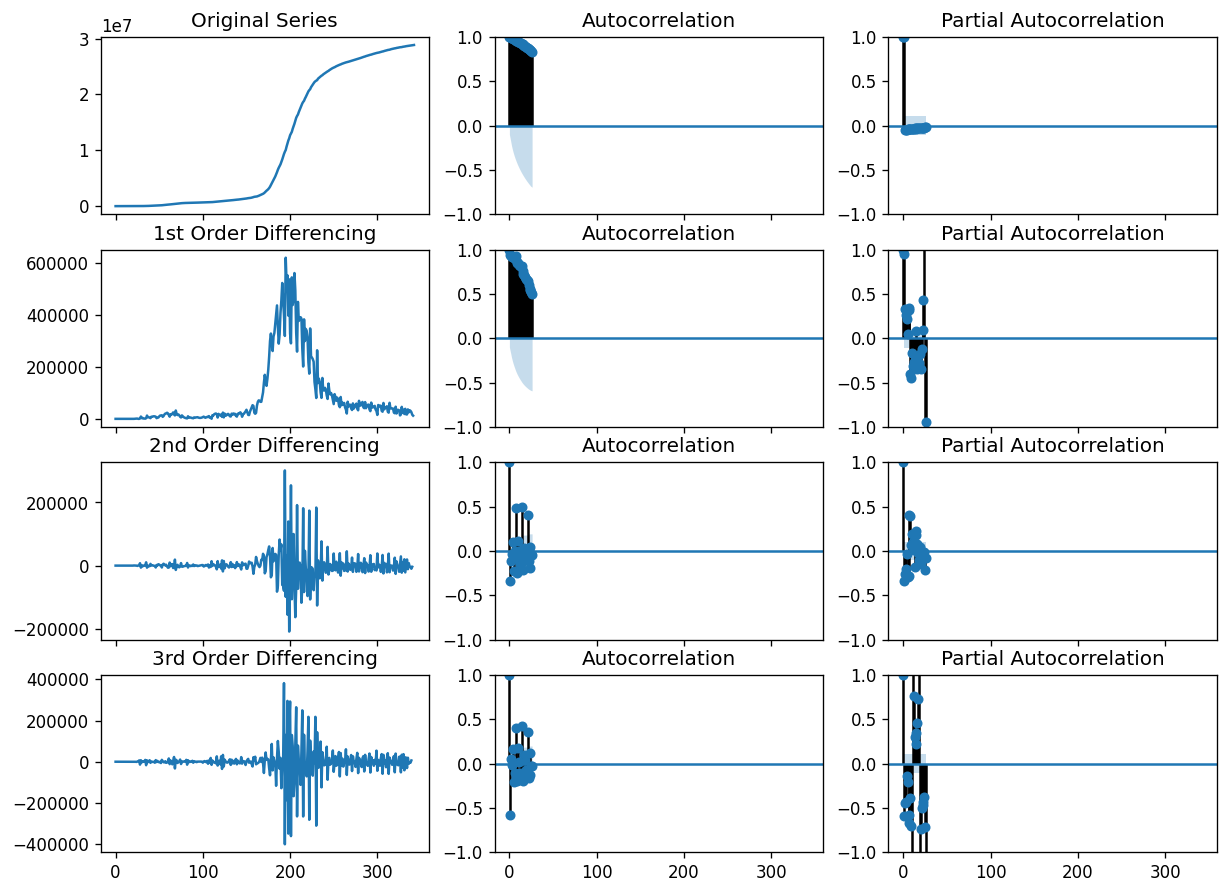

In [ ]:
# Plotting the auto-correlation and partial auto-correlation plots 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(12,9), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 3, sharex=True)
axes[0, 0].plot(can_pfv_df); axes[0, 0].set_title('Original Series')
plot_acf(can_pfv_df, ax=axes[0, 1])
plot_pacf(can_pfv_df, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(np.diff(can_pfv_df)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(can_pfv_df), ax=axes[1, 1])
plot_pacf(np.diff(can_pfv_df), ax=axes[1, 2])
diffval = np.diff(can_pfv_df)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plot_pacf(np.diff(diffval), ax=axes[2, 2])
diffval2 = np.diff(diffval)

# 3rd Differencing
axes[3, 0].plot(np.diff(diffval2)); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(np.diff(diffval2), ax=axes[3, 1])
plot_pacf(np.diff(diffval2), ax=axes[3, 2])
plt.show()

In an autoregressive integrated moving average model, the data are differenced in order to make it stationary. A model that shows stationarity is one that shows there is constancy to the data over time. Most economic and market data show trends, so the purpose of differencing is to remove any trends or seasonal structures. 

From the above plots we can see that the time series data reaches stationarity in the 2nd order differencing itself, the autocorrelation and partial autocorrelation graph shows that all the lags are within the significance level. Whereas, for 3rd order differencing the partial autocorrelation plot clearly shows the lags are going beyond the significance level in both directions positive and negative indicating that it is over differenced.

In [ ]:
# Using the Auto ARIMA model to get the best hyperparameters p,d,q
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(can_pfv_df, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
alpha=0.005,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True,)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=8175.630, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8253.819, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8214.368, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=8176.721, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8251.825, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=8174.292, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=8192.234, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=8174.458, Time=0.44 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=8131.936, Time=0.82 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=8176.285, Time=0.75 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=8176.437, Time=0.44 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=8140.057, Time=1.07 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=8139.476, Time=1.54 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=8131.444, Time=1.43 sec
 ARIMA(3,2,3)(0,0,0)[0]          

**The Best Model chosen is**: ARIMA(2,2,2) Which coresponds to the previously done ACF and PACF plots (2nd order).




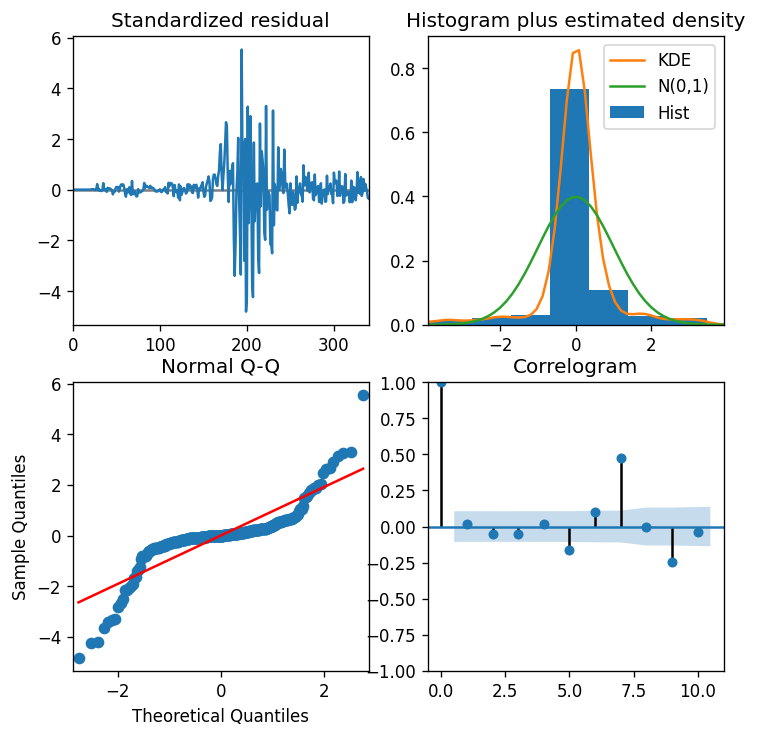

In [ ]:
# Plotting the ARIMA model diagnostics to evaluate the model befor prediction
model.plot_diagnostics(figsize=(7,7))
plt.show()

**Residual error:** We can see that its near 0 mean and has uniform variance and the histogram also shows that the data is almost uniformly distributed with mean 0.

**Normal Q-Q:** Shows that there are some outliers which is the reason why in the **correlogram** there are some lags outside the significance level but overall the model is great as most of the lags are within the level, it will be capable of performing well predicting the values with some errors.  

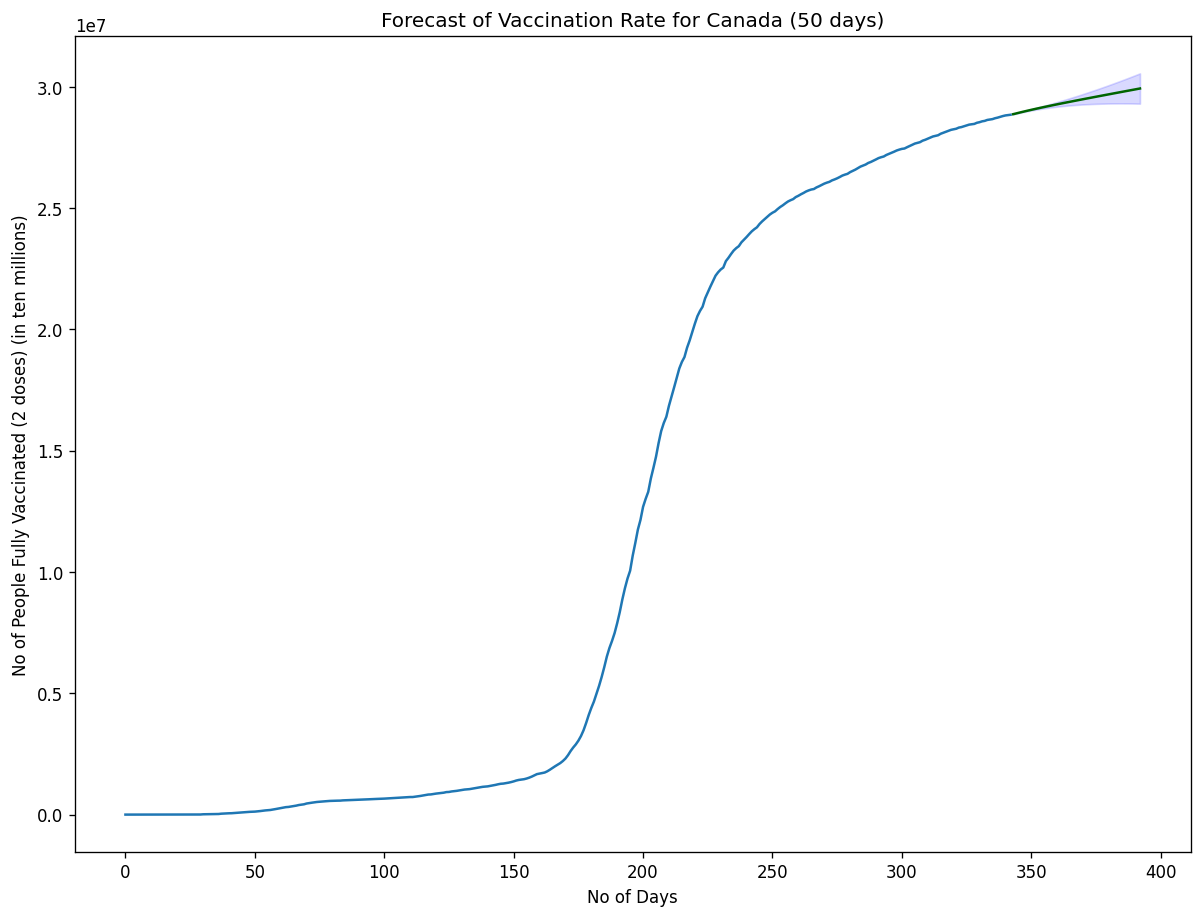

In [ ]:
# Forecasting for 50 days
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True,alpha=0.9)
index_of_fc = np.arange(len(can_pfv_df), len(can_pfv_df)+n_periods)
# print(confint)
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(can_pfv_df)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate for Canada (50 days)")
plt.ylabel('No of People Fully Vaccinated (2 doses) (in ten millions)')
plt.xlabel('No of Days')
plt.show()

From the above plot we can get an idea of how the vaccination rates can go for Canada for the next 50 days under three different scenarios

**Best Case:** This is assuming that the vaccination rate picks up speed this as the name implies will be the best it can go. 

**Base Case:** This is the curve if the vaccination rate neither increased nor decresed and stayed the same.

**Worst Case:** This is assuming that the vaccination rate drops and falls below the current rate.

All these scenarios are predicted only using past data (lags) and past errors (error lags). They donot take into account anyother features that can influence the graph for example the country could have insufficient supply of vaccines in that case the rate would drop drastically and this can't be predicted by the ARIMA model which relies solely on past data. So the given forecast is based on assuming that there won't be any external factors that could affect the vaccination rate. The alpha value was chosen as 0.9 as the worst case scenario curve dropped below the actual vaccination rate so in order to decrease the interval 0.9 alpha was used. This is most likely due to the outliers in the data that the model couldn't capture.

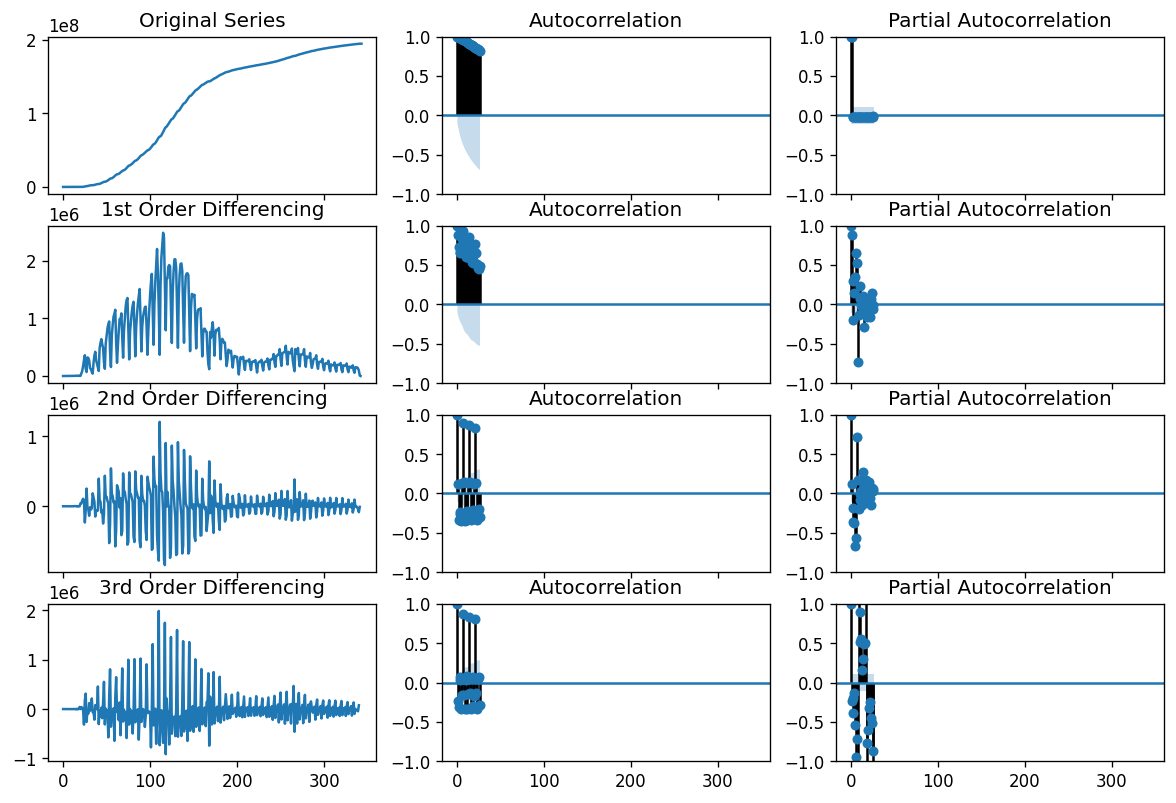

In [ ]:
# Plotting the auto-correlation and partial auto-correlation plots 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 3, sharex=True)
axes[0, 0].plot(us_pfv_df); axes[0, 0].set_title('Original Series')
plot_acf(us_pfv_df, ax=axes[0, 1])
plot_pacf(us_pfv_df, ax=axes[0, 2])


# 1st Differencing
axes[1, 0].plot(np.diff(us_pfv_df)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(us_pfv_df), ax=axes[1, 1])
plot_pacf(np.diff(us_pfv_df), ax=axes[1, 2])
diffval = np.diff(us_pfv_df)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plot_pacf(np.diff(diffval), ax=axes[2, 2])
diffval2 = np.diff(diffval)

# 3rd Differencing
axes[3, 0].plot(np.diff(diffval2)); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(np.diff(diffval2), ax=axes[3, 1])
plot_pacf(np.diff(diffval2), ax=axes[3, 2])
plt.show()

From the above plots we can see that the time series data reaches stationarity in the 2nd order differencing itself, the autocorrelation and partial autocorrelation graph shows that most of the lags are within the significance level. Whereas, for 3rd order differencing the partial autocorrelation plot clearly shows the lags are going beyond the significance level in both directions positive and negative indicating that it is over differenced. So the best model should have 2nd order differencing.

In [ ]:
# Using the Auto ARIMA model to get the best hyperparameters p,d,q
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model2 = pm.auto_arima(us_pfv_df, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=5, max_q=5, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
alpha=0.005,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True,)
print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=9484.039, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=9508.865, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=9505.869, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=9498.813, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9506.871, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=9380.802, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=9461.163, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=9376.067, Time=0.32 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=9451.039, Time=0.08 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=9321.979, Time=0.29 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=9404.655, Time=0.17 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=9193.850, Time=0.43 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=9222.842, Time=0.26 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=9057.752, Time=1.20 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept

**The Best Model chosen is**: ARIMA(5,2,5) Which coresponds to the previously done ACF and PACF plots (2nd order). 

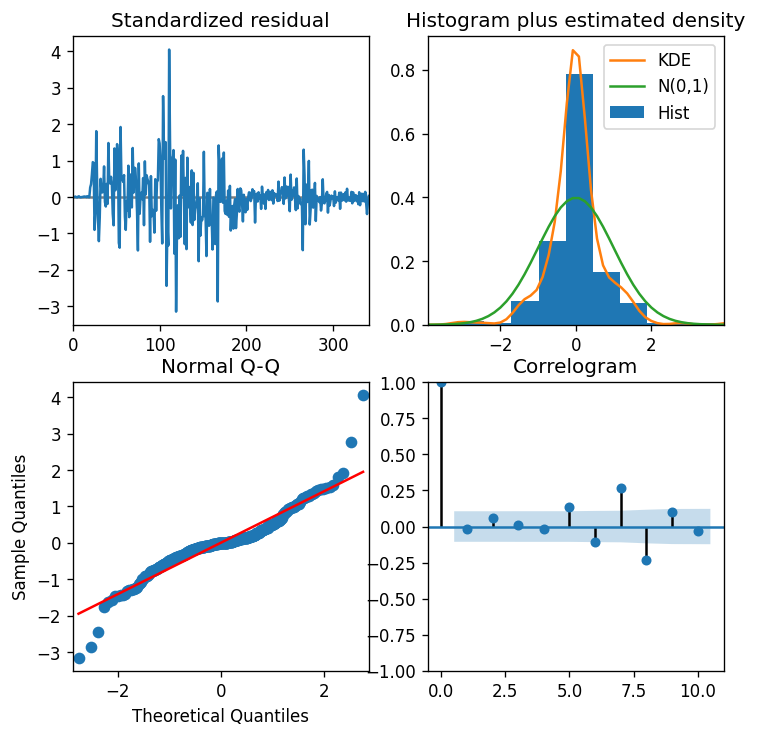

In [ ]:
# Plotting the ARIMA model diagnostics to evaluate the model befor prediction
model2.plot_diagnostics(figsize=(7,7))
plt.show()

Residual Error: It is having a mean around 0 and have uniform variance with minor peaks due to ouliers.

Histogram: The data is almost uniformly distributed with the mean at 0.

Normal Q-Q: There are some outliers in the data but most of the data lie on the red line.

Correlogram: Most of the lags are within the significance level and only two lags are outside the level indicating that the model is good and will be capable of forcasting the data.



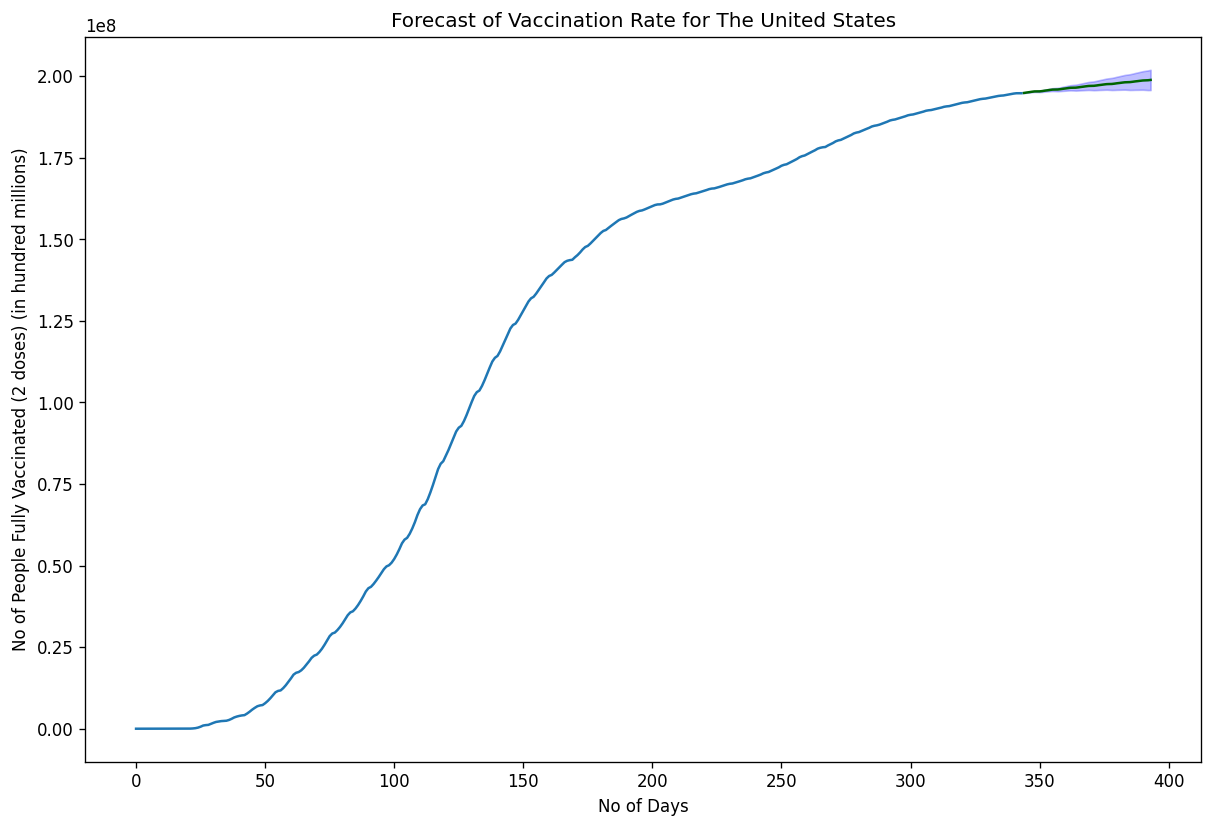

In [ ]:
# Forecast
n_periods = 50
fc, confint = model2.predict(n_periods=n_periods, return_conf_int=True, alpha=0.85)
index_of_fc = np.arange(len(us_pfv_df), len(us_pfv_df)+n_periods)
# print(confint)
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(us_pfv_df)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.25)
plt.title("Forecast of Vaccination Rate for The United States")
plt.ylabel('No of People Fully Vaccinated (2 doses) (in hundred millions)')
plt.xlabel('No of Days')
plt.show()

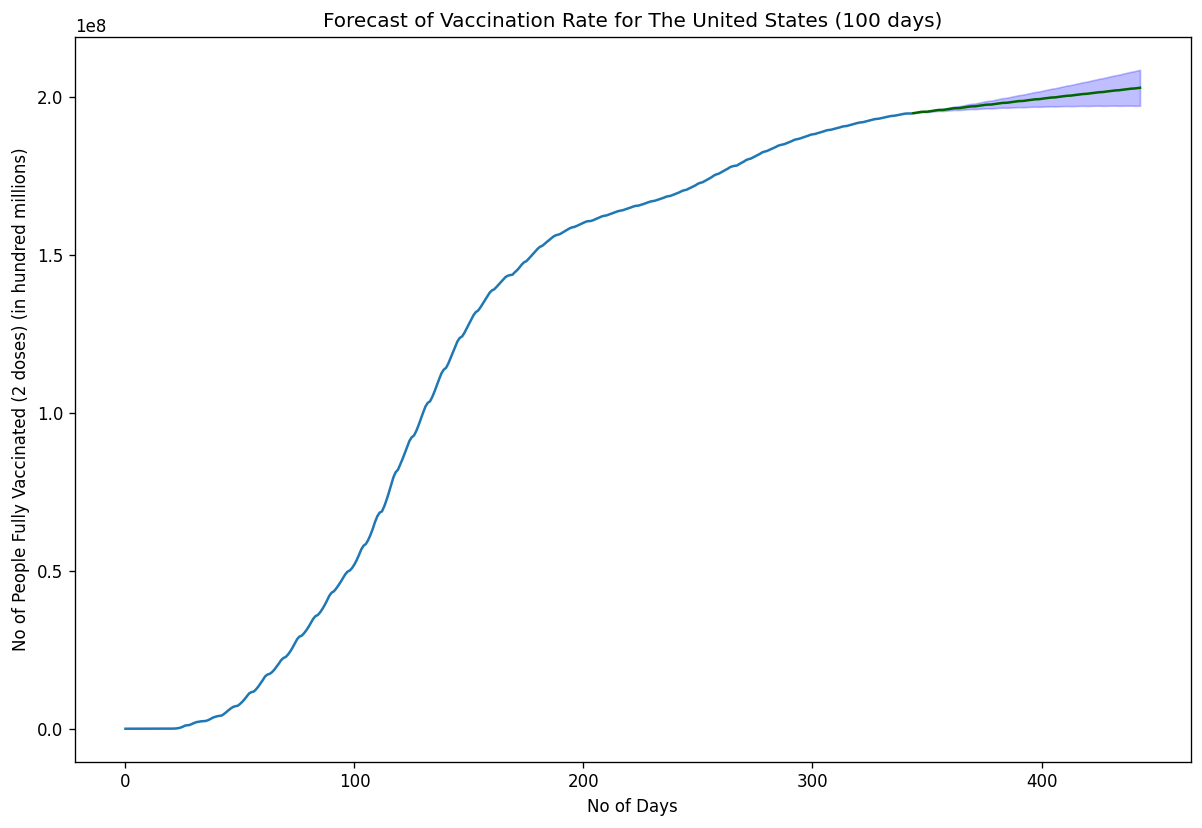

In [ ]:
# Forecast
n_periods = 100
fc, confint = model2.predict(n_periods=n_periods, return_conf_int=True, alpha=0.9)
index_of_fc = np.arange(len(us_pfv_df), len(us_pfv_df)+n_periods)
# print(confint)
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(us_pfv_df)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.25)
plt.title("Forecast of Vaccination Rate for The United States (100 days)")
plt.ylabel('No of People Fully Vaccinated (2 doses) (in hundred millions)')
plt.xlabel('No of Days')
plt.show()

For US the vaccination rate is forcasted for 50 and 100 days as the forecast for 50 days was extremely small to see the confidence interval. Whereas for 100 days it is more visible and the three scenarios (Best,Base and Worst) can be seen clearly.
Similarly, all these scenarios are predicted only using past data (lags) and past errors (error lags). They donot take into account anyother features that can influence the graph.
The alpha value was chosen as 0.9 as the worst case scenario curve dropped below the actual vaccination rate so in order to decrease the interval 0.9 alpha was used. This is most likely due to the outliers in the data that the model couldn't capture. 

**PART 4: Relating COVID-19 Vaccination to a Second Dataset** 

In [ ]:
# The second datset Complete Covid dataset
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134454,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,8841.538,0.663,2.205,311.221,0.066,0.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517.0,1413253.0,93.641,0.101,2564.0,0.170,0.013,77.0,tests performed,6190303.0,3484207.0,2706096.0,NaN,24589.0,22283.0,41.02,23.09,17.93,NaN,1476.0,14852.0,0.098,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134455,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,8845.977,4.439,2.489,311.287,0.066,0.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4467.0,1417720.0,93.937,0.296,2689.0,0.178,0.014,71.6,tests performed,6228119.0,3515140.0,2712979.0,NaN,37816.0,24487.0,41.27,23

In [ ]:
# Removing the Total vaccinactions that have NAN values as they are not usefull
df2 = df2.drop(df2[df2.total_vaccinations.isna()].index)
df2.isna().sum()

iso_code                                          0
continent                                      3902
location                                          0
date                                              0
total_cases                                    1767
new_cases                                      1769
new_cases_smoothed                             1768
total_deaths                                   1910
new_deaths                                     1912
new_deaths_smoothed                            1768
total_cases_per_million                        1767
new_cases_per_million                          1769
new_cases_smoothed_per_million                 1768
total_deaths_per_million                       1910
new_deaths_per_million                         1912
new_deaths_smoothed_per_million                1768
reproduction_rate                              6483
icu_patients                                  26736
icu_patients_per_million                      26736
hosp_patient

In [ ]:
# Taking all the features that we will work with in part 4 alone to clean
new_df = df2[['location','date','total_cases', 'new_cases','total_deaths', 'new_deaths','icu_patients','hosp_patients',
              'weekly_icu_admissions','weekly_hosp_admissions','positive_rate','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',]]
new_df 

,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated
364,Afghanistan,2021-02-22,55617.0,13.0,2433.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
370,Afghanistan,2021-02-28,55714.0,7.0,2443.0,0.0,NaN,NaN,NaN,NaN,NaN,8200.0,8200.0,NaN
386,Afghanistan,2021-03-16,55995.0,10.0,2460.0,1.0,NaN,NaN,NaN,NaN,NaN,54000.0,54000.0,NaN
408,Afghanistan,2021-04-07,56873.0,94.0,2512.0,0.0,NaN,NaN,NaN,NaN,NaN,120000.0,120000.0,NaN
423,Afghanistan,2021-04-22,58312.0,98.0,2561.0,4.0,NaN,NaN,NaN,NaN,NaN,240000.0,240000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134453,Zimbabwe,2021-11-14,133428.0,35.0,4696.0,0.0,NaN,NaN,NaN,NaN,0.013,6165714.0,3469198.0,2696516.0
134454,Zimbabwe,2021-11-15,133438.0,10.0,4697.0,1.0,NaN,NaN,NaN,NaN,0.013,6190303.0,3484207.0,2706096.0
134455,Zimbabwe,2021-11-16,133505.0,67.0,4698.0,1.0,NaN,NaN,NaN,NaN,0.014,6228119.0,3515140.0,2712979.0
134457,Zimbabwe,2021-11-18,133593.0,36.0,4699.0,0.0,NaN,NaN,NaN,NaN,0.013,6310431.0,3583256.0,2727175.0


In [ ]:
# Displaying all the NAN values
new_df.isna().sum()

location                       0
date                           0
total_cases                 1767
new_cases                   1769
total_deaths                1910
new_deaths                  1912
icu_patients               26736
hosp_patients              25473
weekly_icu_admissions      33640
weekly_hosp_admissions     33308
positive_rate              12457
total_vaccinations             0
people_vaccinated           1866
people_fully_vaccinated     4745
dtype: int64

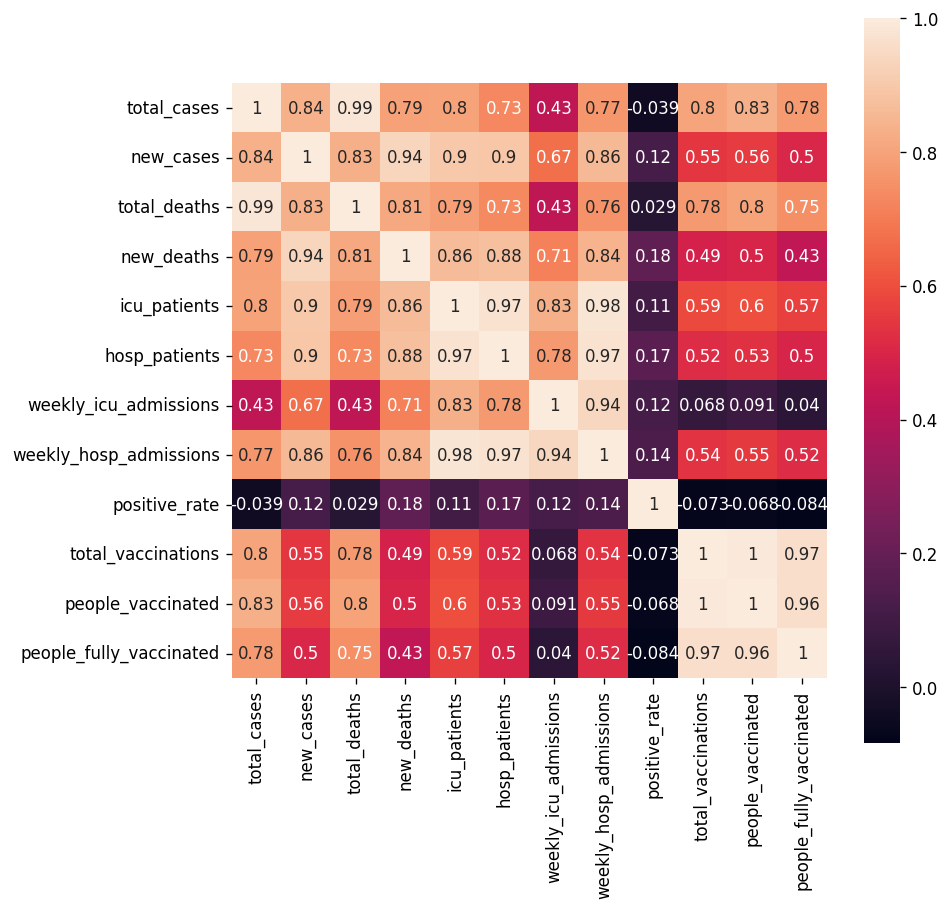

In [ ]:
#correlation matrix in order to spot the features that are correlated to people fully vaccinated feature
plt.subplots(figsize=(8, 8))
sns.heatmap(new_df.corr(), annot=True, square=True)
plt.show()

In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations and people fully vaccinated
mannwhitneyu(new_df['total_vaccinations'],new_df['people_fully_vaccinated'],alternative='two-sided')

MannwhitneyuResult(statistic=586343138.0, pvalue=0.6770628498503652)

As the p-value is greater than 0.05 we accept the null hypothesis that there is a correlation b/w total vaccinations and the people fully vaccinated. So we will fill it with proper values.

In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations and people vaccinated
mannwhitneyu(new_df['total_vaccinations'],new_df['people_vaccinated'],alternative='two-sided')

MannwhitneyuResult(statistic=601799085.0, pvalue=2.8645466486933816e-08)

As the p-value is less than 0.05 we reject the null hypothesis. So there is no correlation b/w the features.

In [ ]:
# Performing the MannWhitneyU test b/w total vaccinations and total cases
mannwhitneyu(new_df['total_vaccinations'],new_df['total_cases'],alternative='two-sided')

MannwhitneyuResult(statistic=756435806.0, pvalue=0.0)

As the p-value is less than 0.05 we reject the null hypothesis. So there is no correlation b/w the features.

In [ ]:
# Filling all the other features with 0 
new_df.people_vaccinated = new_df.people_vaccinated.fillna(0)  
new_df.total_cases = new_df.total_cases.fillna(0)
new_df.new_cases = new_df.new_cases.fillna(0)
new_df.total_deaths = new_df.total_deaths.fillna(0)
new_df.new_deaths = new_df.new_deaths.fillna(0)
new_df.icu_patients = new_df.icu_patients.fillna(0)
new_df.hosp_patients = new_df.hosp_patients.fillna(0)
new_df.weekly_icu_admissions = new_df.weekly_icu_admissions.fillna(0)
new_df.weekly_hosp_admissions = new_df.weekly_hosp_admissions.fillna(0)
new_df.positive_rate = new_df.positive_rate.fillna(0)
# checking for NAN 
new_df.isna().sum()

location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
icu_patients                  0
hosp_patients                 0
weekly_icu_admissions         0
weekly_hosp_admissions        0
positive_rate                 0
total_vaccinations            0
people_vaccinated             0
people_fully_vaccinated    4745
dtype: int64

In [ ]:
# Filling the people fully vaccinated with the appropriate values
imputer2 = IterativeImputer(estimator=LinearRegression(),n_nearest_features=1,min_value=0,random_state=0)

# creating a dataframe with only total vaccinations and people fully vaccinated
check_df3 = new_df[['total_vaccinations','people_fully_vaccinated']]
cols_list = check_df3.columns

# Fitting the imputer to fill in the missing values
df_people_fully_vac = imputer2.fit_transform(check_df3)

# converting it to a dataframe
df_vac = pd.DataFrame(df_people_fully_vac, columns=cols_list)

#dropping the total vaccinations column before concatinating it 
df_vac.drop(columns=['total_vaccinations'],inplace=True)

# droping the original people fully vaccinated column to replace with the new one
new_df.drop(columns=['people_fully_vaccinated'],inplace=True)
new_df.reset_index(inplace=True)
new_df.drop(columns=['index'],inplace=True)

#Final Dataframe after concatinating
new_df = pd.concat([new_df,df_vac],axis='columns')
new_df 

,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,weekly_icu_admissions,weekly_hosp_admissions,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Afghanistan,2021-02-22,55617.0,13.0,2433.0,1.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1,Afghanistan,2021-02-28,55714.0,7.0,2443.0,0.0,0.0,0.0,0.0,0.0,0.000,8200.0,8200.0,0.0
2,Afghanistan,2021-03-16,55995.0,10.0,2460.0,1.0,0.0,0.0,0.0,0.0,0.000,54000.0,54000.0,0.0
3,Afghanistan,2021-04-07,56873.0,94.0,2512.0,0.0,0.0,0.0,0.0,0.0,0.000,120000.0,120000.0,0.0
4,Afghanistan,2021-04-22,58312.0,98.0,2561.0,4.0,0.0,0.0,0.0,0.0,0.000,240000.0,240000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34271,Zimbabwe,2021-11-14,133428.0,35.0,4696.0,0.0,0.0,0.0,0.0,0.0,0.013,6165714.0,3469198.0,2696516.0
34272,Zimbabwe,2021-11-15,133438.0,10.0,4697.0,1.0,0.0,0.0,0.0,0.0,0.013,6190303.0,3484207.0,2706096.0
34273,Zimbabwe,2021-11-16,133505.0,67.0,4698.0,1.0,0.0,0.0,0.0,0.0,0.014,6228119.0,3515140.0,2712979.0
34274,Zimbabwe,2021-11-18,133593.0,36.0,4699.0,0.0,0.0,0.0,0.0,0.0,0.013,6310431.0,3583256.0,2727175.0


In [ ]:
# Grouping by countries
countries2 = new_df.groupby('location')
# Getting Canada and US 
canada_df = countries2.get_group('Canada')
us_df = countries2.get_group('United States')

In [ ]:
# Dropping weekly admission and weekly icu admission as they are fully 0
print('For Canada')
print(canada_df.weekly_hosp_admissions.value_counts())
print(canada_df.weekly_icu_admissions.value_counts())
canada_df.drop(columns=['weekly_hosp_admissions','weekly_icu_admissions'],inplace=True)
print('For US')
print(us_df.weekly_icu_admissions.value_counts())
us_df.drop(columns=['weekly_icu_admissions'],inplace=True)

For Canada
0.0    341
Name: weekly_hosp_admissions, dtype: int64
0.0    341
Name: weekly_icu_admissions, dtype: int64
For US
0.0    342
Name: weekly_icu_admissions, dtype: int64


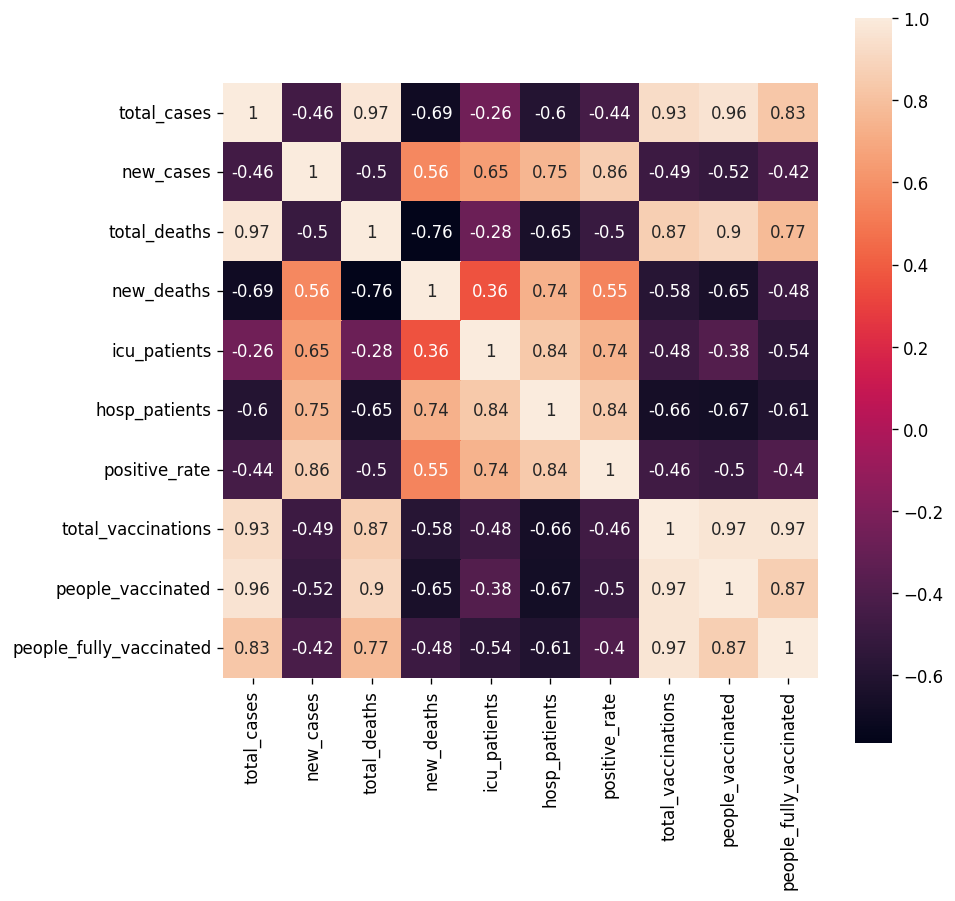

In [ ]:
# For canada corelation heatmap 
plt.subplots(figsize=(8, 8))
sns.heatmap(canada_df.corr(), annot=True, square=True)
plt.show()

We can see that people fully vaccinated is highly correlated to hospital patients, new cases and total deaths 

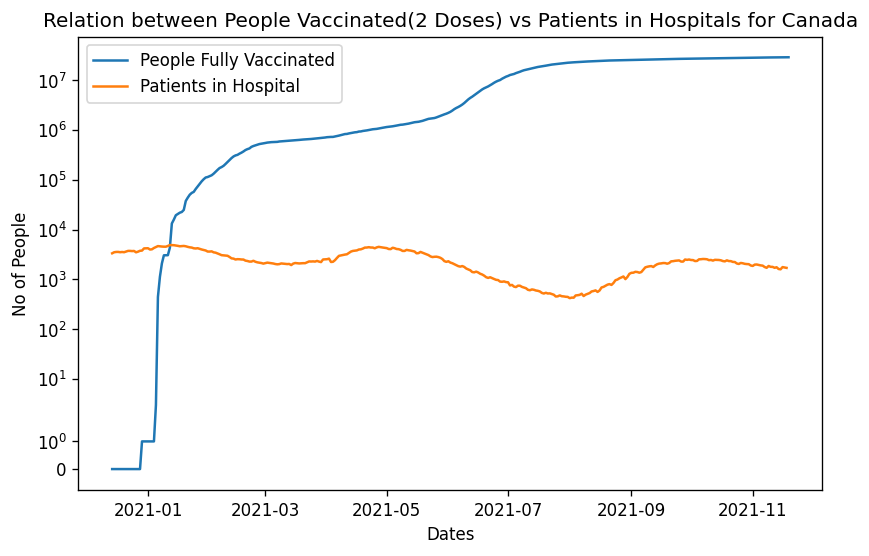

In [ ]:
# Corelation between people_fully_vaccinated and hospital_patients
plt.figure(figsize=(8,5))
canada_df['date'] = pd.to_datetime(canada_df['date'])
plt.plot_date(x=canada_df['date'],y=canada_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated')
# Since the last value in hosp_patients was zero it was removed for the graph
plt.plot_date(x=canada_df['date'].drop(index=5405),y=canada_df['hosp_patients'].drop(index=5405),linestyle= 'solid', marker = "None",label='Patients in Hospital')
plt.yscale('symlog',linthreshx = 10.0)
plt.ylabel('No of People')
plt.xlabel('Dates')
plt.title('Relation between People Vaccinated(2 Doses) vs Patients in Hospitals for Canada')
plt.legend()
plt.show()


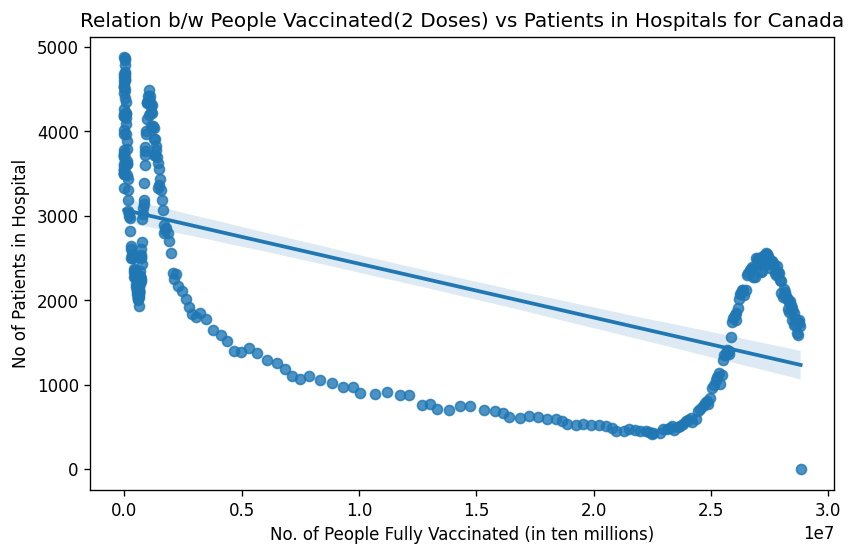

In [ ]:
# Regression plot b/w people fully vaccinated vs hospital patients
plt.figure(figsize=(8,5))
sns.regplot(x=canada_df['people_fully_vaccinated'], y=canada_df['hosp_patients'], data=canada_df)
plt.ylabel('No of Patients in Hospital')
plt.xlabel('No. of People Fully Vaccinated (in ten millions)')
plt.title('Relation b/w People Vaccinated(2 Doses) vs Patients in Hospitals for Canada')
plt.show()

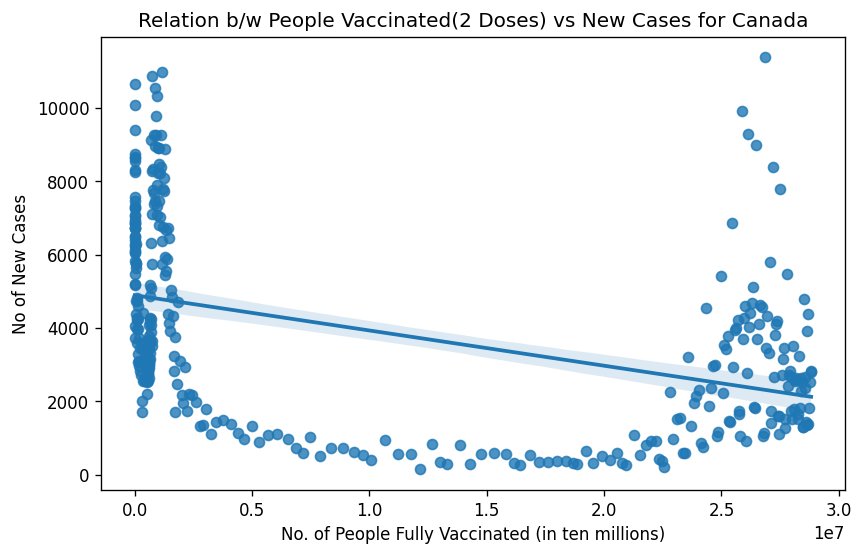

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x=canada_df['people_fully_vaccinated'], y=canada_df['new_cases'], data=canada_df)
plt.ylabel('No of New Cases')
plt.xlabel('No. of People Fully Vaccinated (in ten millions)')
plt.title('Relation b/w People Vaccinated(2 Doses) vs New Cases for Canada')
plt.show()

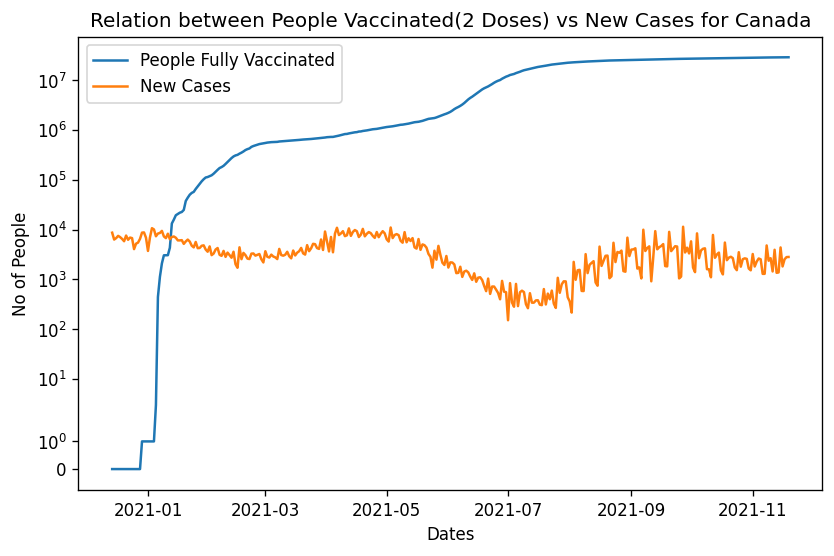

In [ ]:
plt.figure(figsize=(8,5))
canada_df['date'] = pd.to_datetime(canada_df['date'])
plt.plot_date(x=canada_df['date'],y=canada_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated')
plt.plot_date(x=canada_df['date'],y=canada_df['new_cases'],linestyle= 'solid', marker = "None",label='New Cases')
plt.yscale('symlog',linthreshx = 10.0)
plt.ylabel('No of People')
plt.xlabel('Dates')
plt.title('Relation between People Vaccinated(2 Doses) vs New Cases for Canada')
plt.legend()
plt.show()


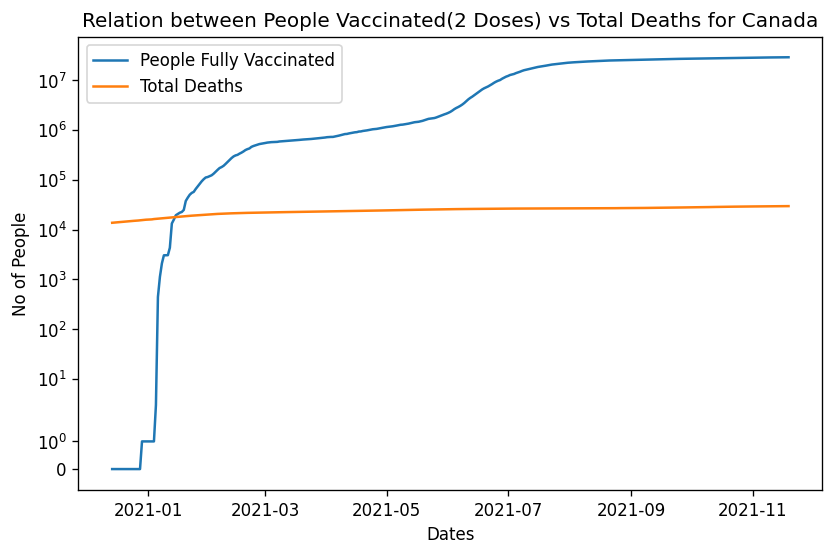

In [ ]:
plt.figure(figsize=(8,5))
canada_df['date'] = pd.to_datetime(canada_df['date'])
plt.plot_date(x=canada_df['date'],y=canada_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated')
plt.plot_date(x=canada_df['date'],y=canada_df['total_deaths'],linestyle= 'solid', marker = "None",label='Total Deaths')
plt.yscale('symlog',linthreshx = 10)
plt.ylabel('No of People')
plt.xlabel('Dates')
plt.title('Relation between People Vaccinated(2 Doses) vs Total Deaths for Canada')
plt.legend()
plt.show()

From the above graphs we can see that as the total number of vaccinated people increased the deaths and new cases decreased. But at the end it does increase a little again this might be due to some people not taking the vaccines causing it to spread or due to the vaccines not being effective against the new variants. 

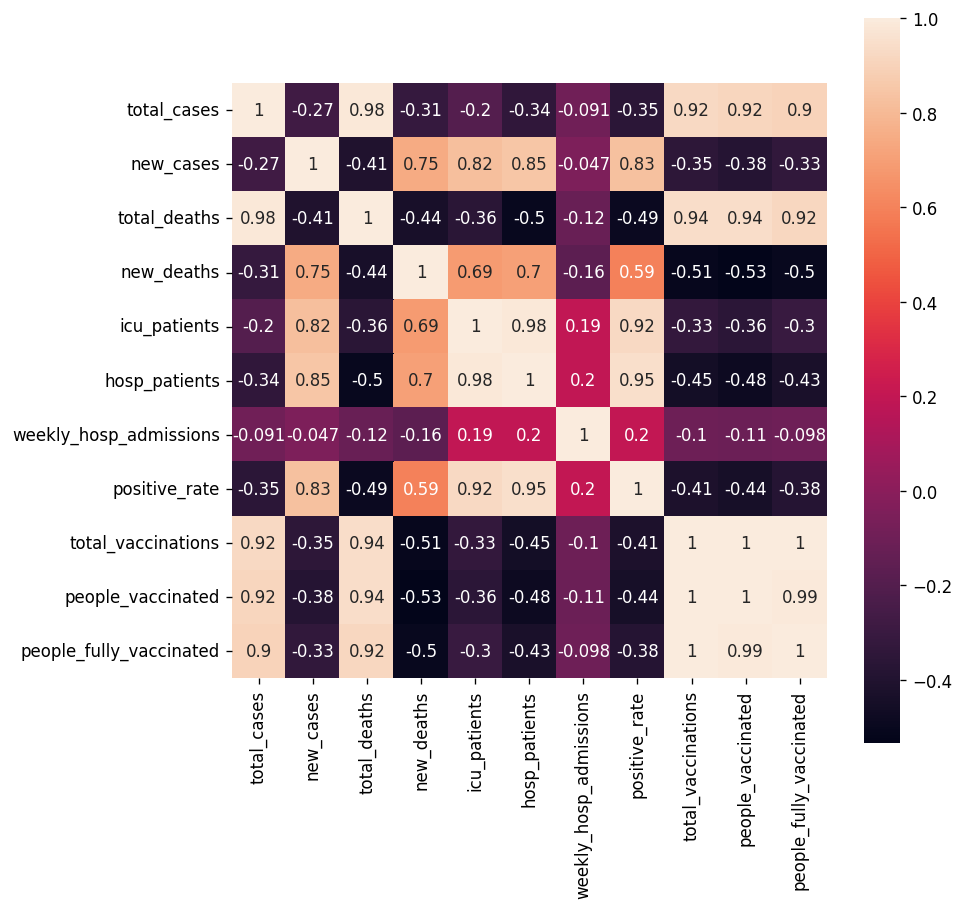

In [ ]:
# For US corelation heatmap 
plt.subplots(figsize=(8, 8))
sns.heatmap(us_df.corr(), annot=True, square=True)
plt.show()

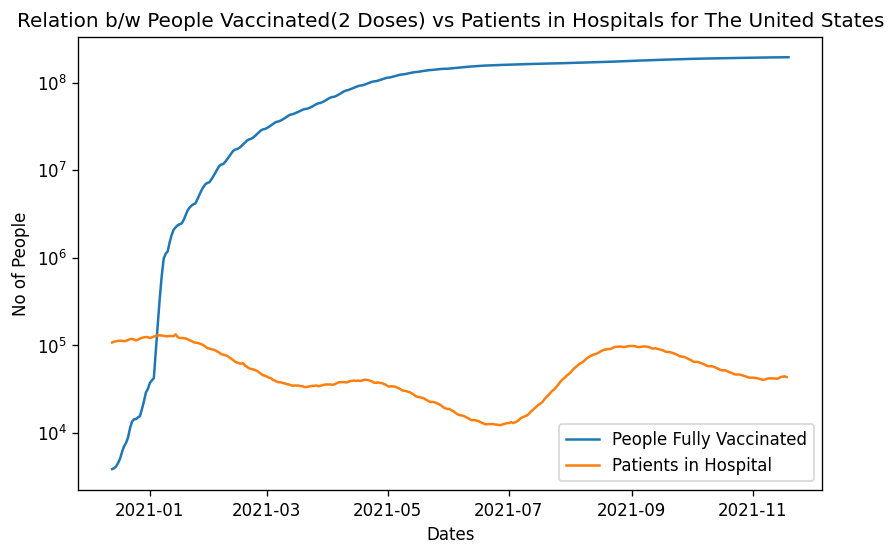

In [ ]:
# Corelation between people_fully_vaccinated and hospital_patients
plt.figure(figsize=(8,5))
us_df['date'] = pd.to_datetime(us_df['date'])
plt.plot_date(x=us_df['date'],y=us_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated')
# Since the last value in hosp_patients was zero it was removed for the graph
plt.plot_date(x=us_df['date'].drop(index=32558),y=us_df['hosp_patients'].drop(index=32558),linestyle= 'solid', marker = "None",label='Patients in Hospital')
plt.yscale('symlog',linthreshx = 10.0)
plt.ylabel('No of People')
plt.xlabel('Dates')
plt.title('Relation b/w People Vaccinated(2 Doses) vs Patients in Hospitals for The United States')
plt.legend()
plt.show()

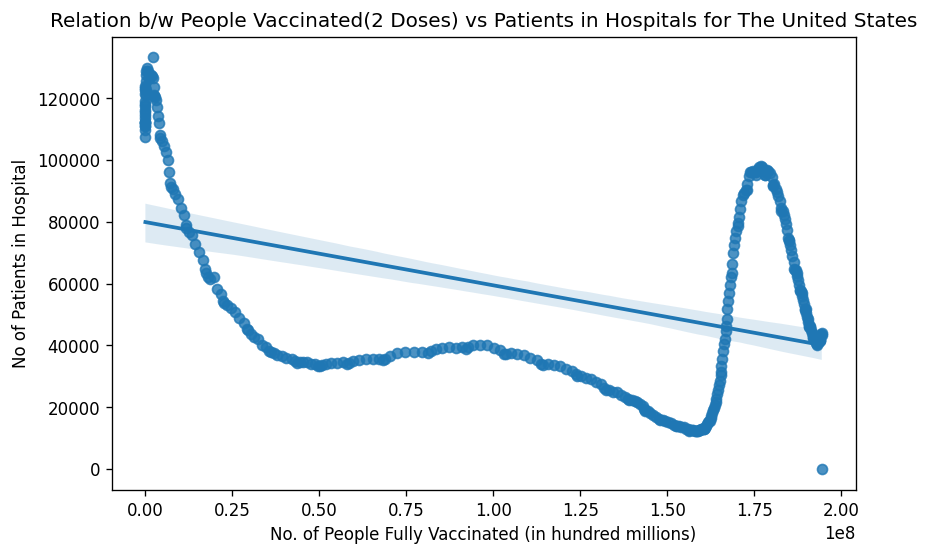

In [ ]:
# Regression plot b/w people fully vaccinated vs hospital patients
plt.figure(figsize=(8,5))
sns.regplot(x=us_df['people_fully_vaccinated'], y=us_df['hosp_patients'], data=us_df)
plt.ylabel('No of Patients in Hospital')
plt.xlabel('No. of People Fully Vaccinated (in hundred millions)')
plt.title('Relation b/w People Vaccinated(2 Doses) vs Patients in Hospitals for The United States')
plt.show()

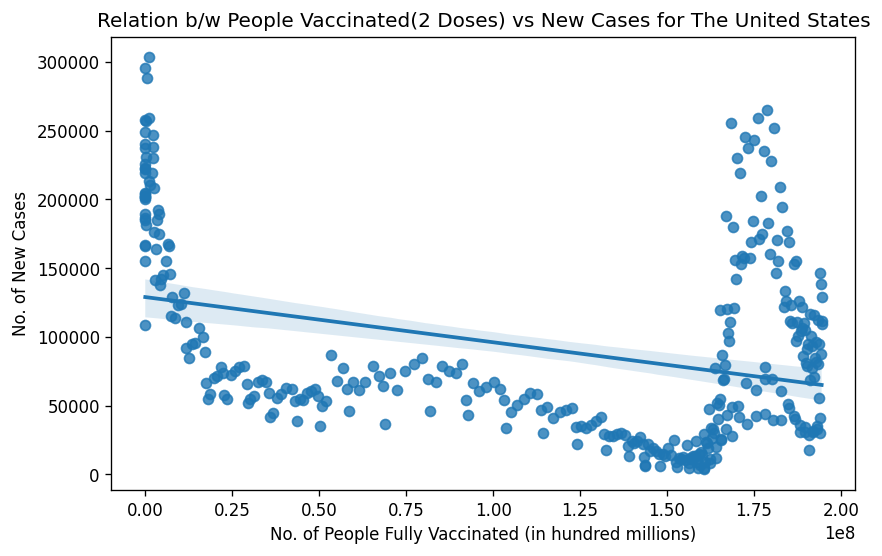

In [ ]:
# Regression plot b/w people fully vaccinated vs new cases
plt.figure(figsize=(8,5))
sns.regplot(x=us_df['people_fully_vaccinated'], y=us_df['new_cases'], data=us_df)
plt.ylabel('No. of New Cases')
plt.xlabel('No. of People Fully Vaccinated (in hundred millions)')
plt.title('Relation b/w People Vaccinated(2 Doses) vs New Cases for The United States')
plt.show()

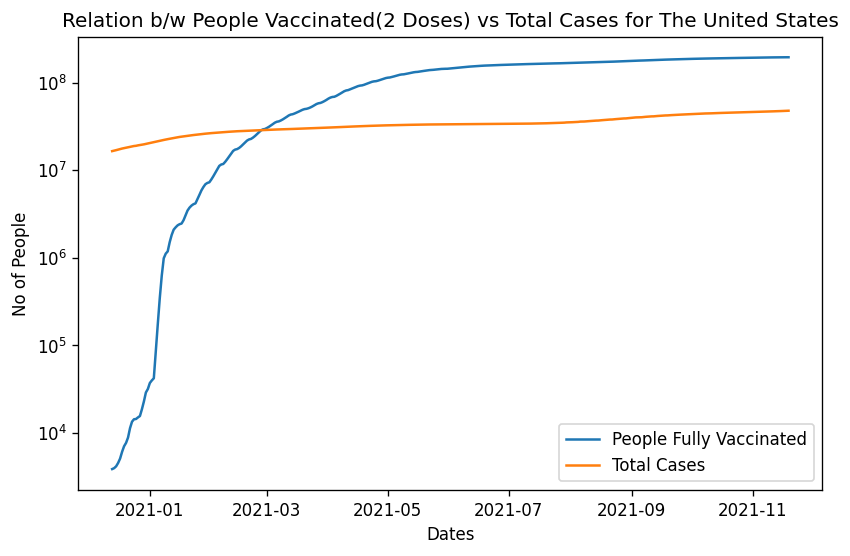

In [ ]:
# plot b/w people fully vaccinated vs total cases
plt.figure(figsize=(8,5))
us_df['date'] = pd.to_datetime(us_df['date'])
plt.plot_date(x=us_df['date'],y=us_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated')
plt.plot_date(x=us_df['date'],y=us_df['total_cases'],linestyle= 'solid', marker = "None",label='Total Cases')
plt.yscale('symlog',linthreshx = 10.0)
plt.ylabel('No of People')
plt.xlabel('Dates')
plt.title('Relation b/w People Vaccinated(2 Doses) vs Total Cases for The United States')
plt.legend()
plt.show()

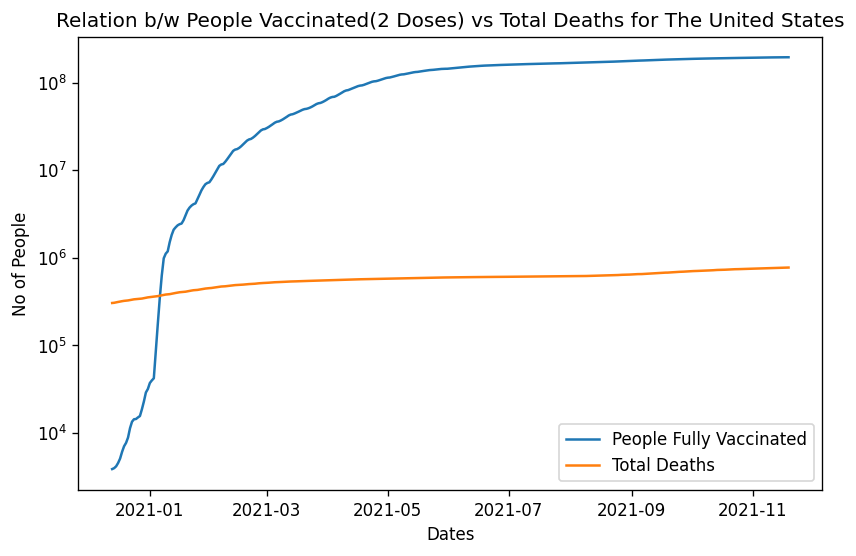

In [ ]:
# plot b/w people fully vaccinated vs total deaths
plt.figure(figsize=(8,5))
us_df['date'] = pd.to_datetime(us_df['date'])
plt.plot_date(x=us_df['date'],y=us_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated')
plt.plot_date(x=us_df['date'],y=us_df['total_deaths'],linestyle= 'solid', marker = "None",label='Total Deaths')
plt.yscale('symlog',linthreshx = 10.0)
plt.ylabel('No of People')
plt.xlabel('Dates')
plt.title('Relation b/w People Vaccinated(2 Doses) vs Total Deaths for The United States')
plt.legend()
plt.show()

Similarly as before for Canada, we can see that even for US as the total number of vaccinated people increased the deaths and new cases decreased. But at the end it does increase a little again this might be due to some people not taking the vaccines causing it to spread or due to the vaccines not being effective against the new variants. 

**PART 5: Deriving insights about the effect of vaccination and discussion**

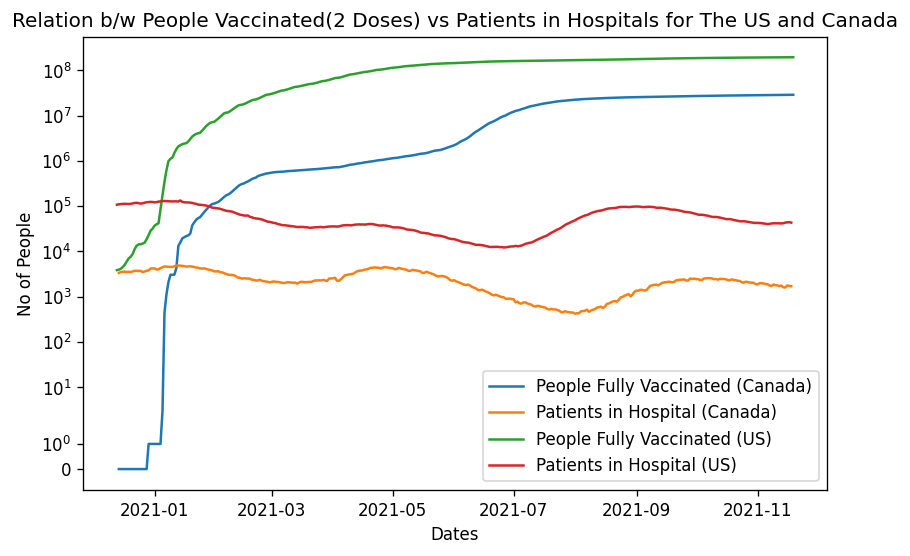

In [ ]:
# Corelation between people_fully_vaccinated and hospital_patients
plt.figure(figsize=(8,5))
us_df['date'] = pd.to_datetime(us_df['date'])
canada_df['date'] = pd.to_datetime(canada_df['date'])
plt.plot_date(x=canada_df['date'],y=canada_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated (Canada)')
# Since the last value in hosp_patients was zero it was removed for the graph
plt.plot_date(x=canada_df['date'].drop(index=5405),y=canada_df['hosp_patients'].drop(index=5405),linestyle= 'solid', marker = "None",label='Patients in Hospital (Canada)')
plt.plot_date(x=us_df['date'],y=us_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated (US)')
# Since the last value in hosp_patients was zero it was removed for the graph
plt.plot_date(x=us_df['date'].drop(index=32558),y=us_df['hosp_patients'].drop(index=32558),linestyle= 'solid', marker = "None",label='Patients in Hospital (US)')
plt.yscale('symlog',linthreshx = 10.0)
plt.ylabel('No of People')
plt.xlabel('Dates')
plt.title('Relation b/w People Vaccinated(2 Doses) vs Patients in Hospitals for The US and Canada')
plt.legend()
plt.show()

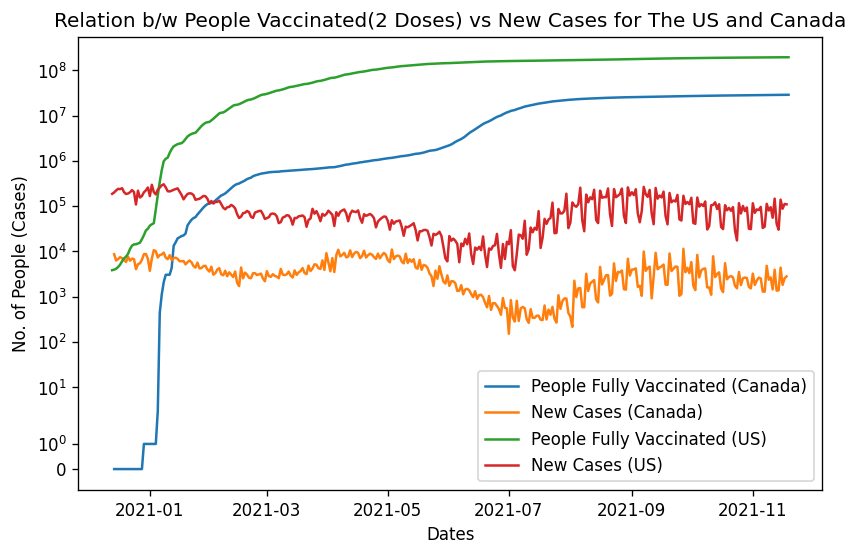

In [ ]:
# Corelation between people_fully_vaccinated and hospital_patients
plt.figure(figsize=(8,5))
us_df['date'] = pd.to_datetime(us_df['date'])
canada_df['date'] = pd.to_datetime(canada_df['date'])
plt.plot_date(x=canada_df['date'],y=canada_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated (Canada)')
# Since the last value in hosp_patients was zero it was removed for the graph
plt.plot_date(x=canada_df['date'].drop(index=5405),y=canada_df['new_cases'].drop(index=5405),linestyle= 'solid', marker = "None",label='New Cases (Canada)')
plt.plot_date(x=us_df['date'],y=us_df['people_fully_vaccinated'],linestyle= 'solid', marker = "None",label='People Fully Vaccinated (US)')
# Since the last value in hosp_patients was zero it was removed for the graph
plt.plot_date(x=us_df['date'].drop(index=32558),y=us_df['new_cases'].drop(index=32558),linestyle= 'solid', marker = "None",label='New Cases (US)')
plt.yscale('symlog',linthreshx = 10.0)
plt.ylabel('No. of People (Cases)')
plt.xlabel('Dates')
plt.title('Relation b/w People Vaccinated(2 Doses) vs New Cases for The US and Canada')
plt.legend()
plt.show()

**Which of your chosen countries has the most effective vaccination program? From what aspects? Why?  What  discoveries  have  you  made  as  a  result  of  the  dataset  and  your  models? Use evidence-based  insights  derived  about  the  disease  from  your  model(s)  and  your  data analysis to justify your findings.** 



**In PART 3:**

I am analyzing the COVID 19 vaccination rates in Canada and US using the ARIMA model to output three projections. The ARIMA model aims to forecast the rate of vaccination for the US and Canada for the next 50 days based on the past data collected for the respective countries. 

The three projections are the Worst Case, Base Case and Best Case. 

**CANADA**

**For Worst Case:** 

The projection shows that in the 50 day period of time, the vaccination rate curve would just flatline as the people are not willing to get vaccinated. This would result in another spike of covid-19 cases as the unvaccinated ones will start spreading it leading to more lockdowns and deaths. 

**For Base Case:**

 This projection shows that the vaccination rate curve would be moving/increasing at a similar rate as the present neither bad nor good. This scenario indicates that the people are unsure to get the vaccine or not and very few people are taking it at a steady rate. 
 
**For Best Case:**

 This projection shows that the vaccination rate curve is on an incremental rise indicating that more and more people are taking the vaccines and this scenario would lead to fewer new cases and deaths and would result in a world free from covid. This case would happen if the government increased the daily vaccination rates and if the people are willing to take the vaccine.  

**US**

**For Worst Case:**

For the US the worst case vaccination curve unlike canada's it barely increased and has a constant flatline indicating that the worst case for the US is worse than Canada's. This is most likely due to the population difference between the two countries as more people in the US may be unwilling to partake in the vaccination program due to the poor communication between the government and its people. This would result in another wave causing more deaths.

**For Base Case:**

The projection shows a slight constant increase over the current trends indicating that the people are slowing getting vaccinated. This again could be attributed to the population of US and the lack of proper communication of the vaccine and its effects by the government.

**For Best Caes:**

The vaccination rate curve can be seen increasing at an almost linear state this could lead to the entire population being vaccinated and ending the pandemic or at the least lower the deaths by increasing the immunity of the people through the vaccine. This scenario can be achieved if all the people took the vaccine and also followed proper covid protocols like social distancing and waering a mask in public spaces.

**PART 4:**

1) Its hard to say which country had the best vaccination rate as we can see from the above two graphs both countries performed very similar to eachother. 

2) Since the US has a much higher population the number of total deaths, new cases and the people fully vaccinated are much higher than Canada.

3) If we look in terms of population percentages they are very similar as both countries had a spike in new cases when the number of fully vaccinated people reached more than 60% of their population. 

4) As of December 2021 Canada has 76.9% fully vaccinated whereas US is 61.1% are fully vaccinated.

**Suggested Improvements:**

1) Government should pay close attention to the most populous states/provinces, and prioritize the vaccinations here first as most of the infected reports/cases will be from here.


2) Social distance is the key to control the epidemic even with the vaccine rollout and government should also recommend wearing masks to decrease the infective rate.

3) Social distancing and travel restrictions should be implemented along with increasing testing and daily vaccinations until there is a sustained reduction in the number of new cases.

If all these are followed then the best case scenario can be achieved for both the countries.



